# - Liste des guichets automatiques bancaires (GAB)

 Ce fichier représente la liste des guichets automatiques bancaires (GAB) de BMCE , avec l'adresse du distributeur, la meteo, Cash In et Cash out  mais également les différentes options possibles (impression RIB, dépôt d'espèce, etc.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#spark 
import findspark
findspark.init()
import pyspark
#sc.stop()
sc = pyspark.SparkContext(appName="BAO")
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer
from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator

print ('import completed')
import warnings
warnings.filterwarnings('ignore') # pour supprimier warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition # PCA
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
# Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#from pyspark.ml.classification import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
#Regression 
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
#Deep Learing 
#libraries and packages ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
#LSTM
import numpy as np # linear algebra
from numpy import newaxis
from keras.layers.core import Activation, Dropout
from keras.layers.recurrent import LSTM
from keras import optimizers

import completed


In [2]:
from timeit import default_timer as timer

# Collection des données :

In [3]:
start =timer()
Gab = pd.read_csv('TraitemenATM.csv', sep = ',')
end = timer()
print(end- start)


21.165126103000006


In [3]:
import findspark
findspark.init()
import pyspark
sc = pyspark.SparkContext(appName="1PI")



ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=BAO, master=local[*]) created by __init__ at <ipython-input-1-c352e76af053>:14 

In [63]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

In [4]:
sc.stop()
sc = SparkContext(appName = "BAO")
spark = SparkSession.Builder().getOrCreate()
sqlContext = SQLContext(spark.sparkContext)
sqlContext


In [5]:
from timeit import default_timer as timer
start =timer()
df= sqlContext.read.csv('ATM10.csv', header='true', inferSchema='true')
end = timer()
print(end- start)

11.245293354033493


In [8]:
df.select('ID_TRANSACTION','ANNEE',
          'MOIS','JOUR','SEMAINE','HEURE','GAB_ETAT','GAB_ID',
          'GAB_FABRIC','GAB_RUE_NUM','GAB_ZIPCODE','GAB_LAT','GAB_LON').show()

+--------------+-----+----+----+-------+-----+--------+------+----------+-----------+-----------+-----------+-----------+
|ID_TRANSACTION|ANNEE|MOIS|JOUR|SEMAINE|HEURE|GAB_ETAT|GAB_ID|GAB_FABRIC|GAB_RUE_NUM|GAB_ZIPCODE|    GAB_LAT|    GAB_LON|
+--------------+-----+----+----+-------+-----+--------+------+----------+-----------+-----------+-----------+-----------+
|            46| 2017|   4|   1|      3|    1|       0|     1|         1|          8|       4700|55.23342278|11.76327044|
|           175| 2017|   4|   1|      3|    2|       0|     1|         1|          8|       4700|55.23342278|11.76327044|
|           214| 2017|   4|   1|      3|    3|       0|     1|         1|          8|       4700|55.23342278|11.76327044|
|           240| 2017|   4|   1|      3|    3|       0|     1|         1|          8|       4700|55.23342278|11.76327044|
|           402| 2017|   4|   1|      3|    8|       0|     1|         1|          8|       4700|55.23342278|11.76327044|
|           417| 2017|  

In [12]:
from timeit import default_timer as timer
start =timer()
df= sqlContext.read.csv('TraitemenATM.csv', header='true', inferSchema='true')
end = timer()
print(end- start)

16.44372628400015


In [10]:
start =timer()
df = spark.read.format("csv").option("header", "true").load("TraitemenATM.csv")
end = timer()
print(end- start)

0.3893760530008876


In [13]:
df.columns

['_c0',
 'year',
 'month',
 'day',
 'weekday',
 'hour',
 'atm_status',
 'atm_id',
 'atm_manufacturer',
 'atm_location',
 'atm_streetname',
 'atm_street_number',
 'atm_zipcode',
 'atm_lat',
 'atm_lon',
 'currency',
 'card_type',
 'service',
 'message_code',
 'message_text',
 'weather_lat',
 'weather_lon',
 'weather_city_id',
 'weather_city_name',
 'temp',
 'pressure',
 'humidity',
 'wind_speed',
 'wind_deg',
 'rain_3h',
 'clouds_all',
 'weather_id',
 'weather_main',
 'weather_description',
 'totalBalance',
 'nbTransaction',
 'totalOutcome',
 'totalIncome']

In [55]:
df.select( 'wind_deg',
 'rain_3h',
 'clouds_all',
 'weather_id',
 'weather_main',
 'weather_description',
 'totalBalance',
 'nbTransaction',
 'totalOutcome',
 'totalIncome').show()

+--------+-------+----------+----------+------------+--------------------+------------+-------------+------------+-----------+
|wind_deg|rain_3h|clouds_all|weather_id|weather_main| weather_description|totalBalance|nbTransaction|totalOutcome|totalIncome|
+--------+-------+----------+----------+------------+--------------------+------------+-------------+------------+-----------+
|     260|  0.215|        92|       500|        Rain|          light rain|       47880|           59|        3706|       5178|
|     250|   0.59|        92|       500|        Rain|          light rain|       12823|           47|        2309|       5561|
|     250|   0.59|        92|       500|        Rain|          light rain|       40297|           95|        8037|       7775|
|     240|   null|        75|       300|     Drizzle|light intensity d...|       51849|           98|        6195|       2508|
|     260|   null|        88|       701|        Mist|                mist|       32632|           96|        53

In [3]:
Gab.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'weekday', 'hour', 'atm_status',
       'atm_id', 'atm_manufacturer', 'atm_location', 'atm_streetname',
       'atm_street_number', 'atm_zipcode', 'atm_lat', 'atm_lon', 'currency',
       'card_type', 'service', 'message_code', 'message_text', 'weather_lat',
       'weather_lon', 'weather_city_id', 'weather_city_name', 'temp',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'totalBalance', 'nbTransaction', 'totalOutcome', 'totalIncome'],
      dtype='object')

## 1. Analyse des données des GAB bancaires et traitement catégorique
### Travailler avec les atributs liés aux GAB bancaires


In [5]:
print('le nombre des GABs   : ',len(Gab['atm_id'].unique()))
print('\n **************************\n')
print('le nombre des transactions sur data   : ',Gab.shape)
print('\n **************************\n')

print('Id Gab : ' , Gab['atm_id'].unique())
print('\n **************************\n')
#print('Count des transactions pour chaque guichet :\n \n',Counter(Gab['atm_id']))

le nombre des GABs   :  113

 **************************

le nombre des transactions sur data   :  (2468572, 38)

 **************************

Id Gab :  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113]

 **************************



## Pour rendre les choses plus claires, je vais créer un nouvel ensemble de données qui contient uniquement  des données de temps :

In [4]:
Gab_Date=Gab.iloc[:,1:8]
Gab_Date.head()

,year,month,day,weekday,hour,atm_status,atm_id
0,2017,January,1,Sunday,0,Active,1
1,2017,January,1,Sunday,0,Inactive,2
2,2017,January,1,Sunday,0,Inactive,2
3,2017,January,1,Sunday,0,Inactive,3
4,2017,January,1,Sunday,0,Active,4


# Connaître les variables catégorielles

In [5]:
print('Années :\n', Gab_Date['year'].unique())
print('Les mois :\n', Gab_Date['month'].unique())
print('Les jours :\n', Gab_Date['day'].unique())
print('les semaines :\n',Gab_Date['weekday'].unique())
print('les heures :\n', Gab_Date['hour'].unique())
print('l etat d Gab:\n', Gab_Date['atm_status'].unique())
print('id Atm:\n', Gab_Date['atm_id'].unique())

Années :
 [2017]
Les mois :
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
Les jours :
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
les semaines :
 ['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
les heures :
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
l etat d Gab:
 ['Active' 'Inactive']
id Atm:
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113]


## Essayer de trouver des idées sur les dates :

In [6]:
print('Null Values: ', Gab_Date.isnull().any())

Null Values:  year          False
month         False
day           False
weekday       False
hour          False
atm_status    False
atm_id        False
dtype: bool


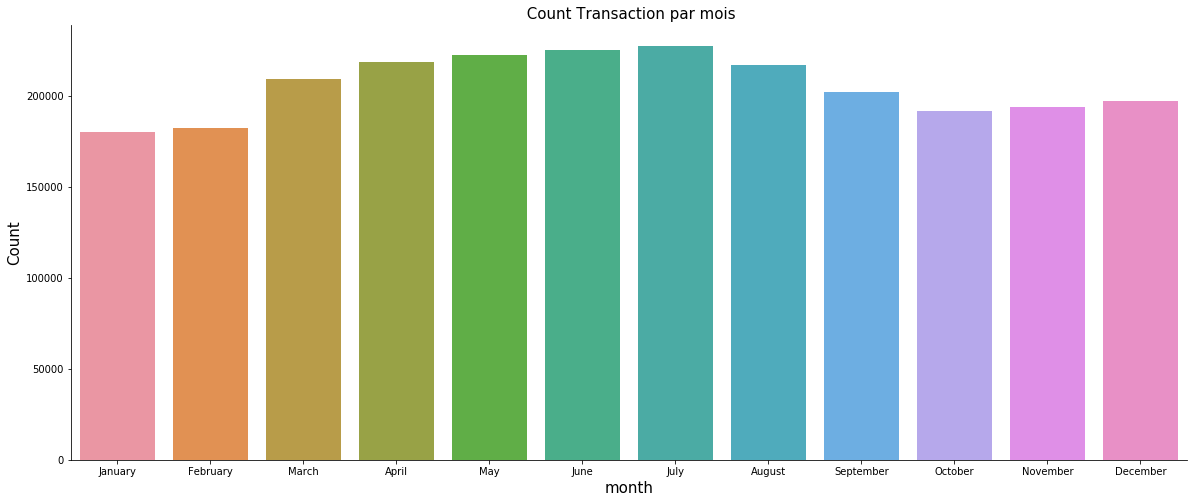

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'month', data = Gab_Date)
ax.set_xlabel('month', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title(' Count Transaction par mois', fontsize=15)
sns.despine()

# Le nombre des transactions des Gab pour chaque mois :

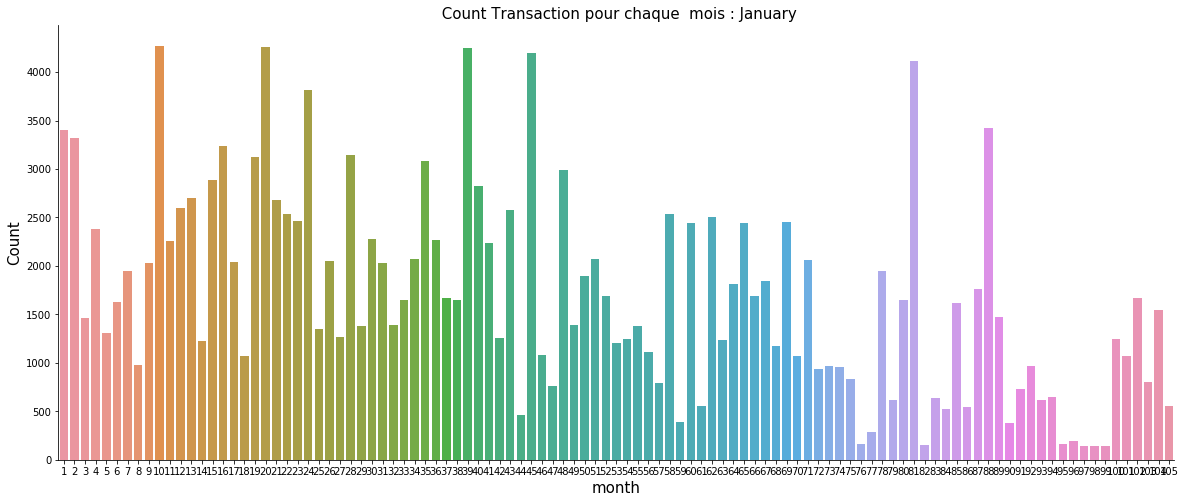

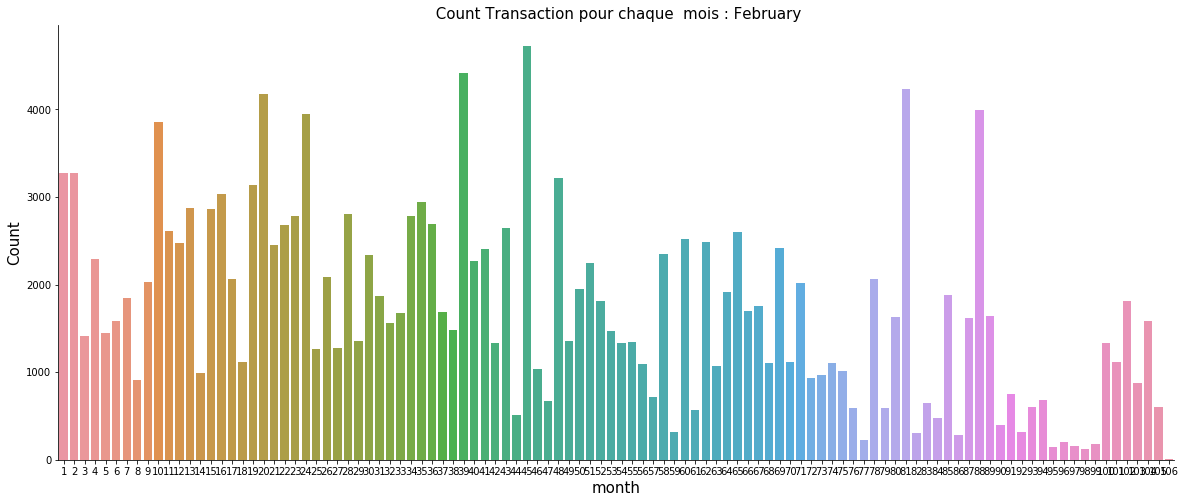

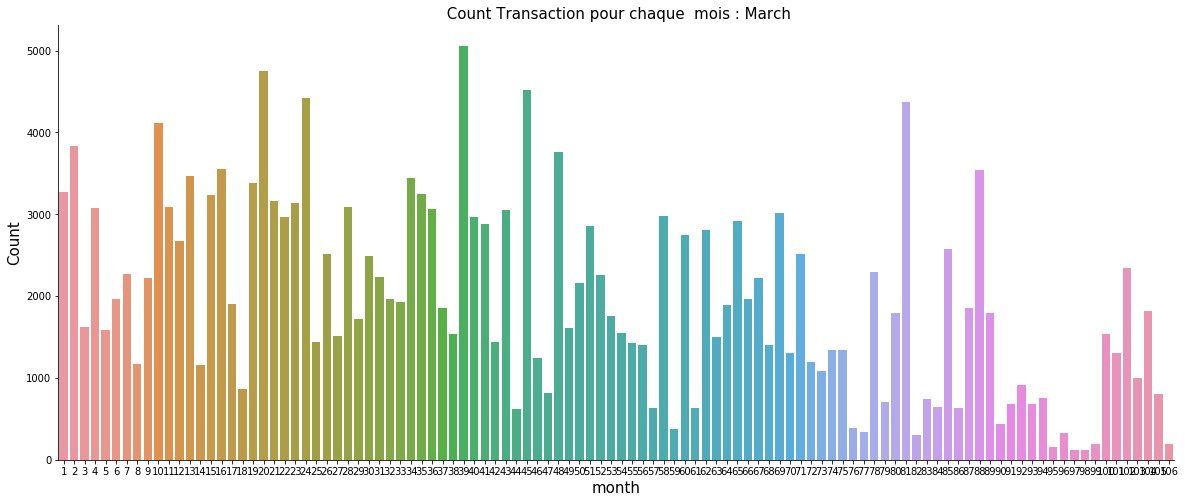

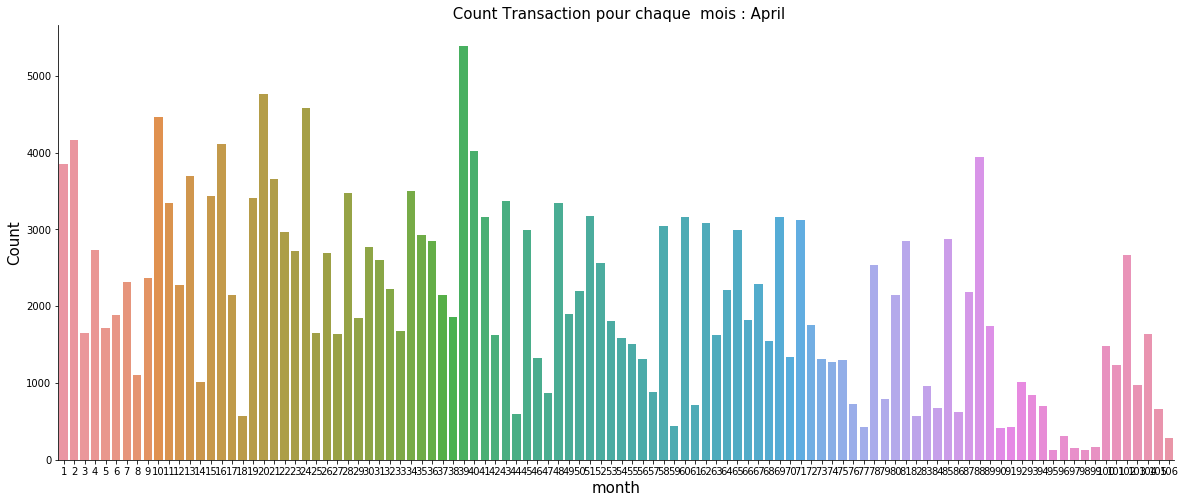

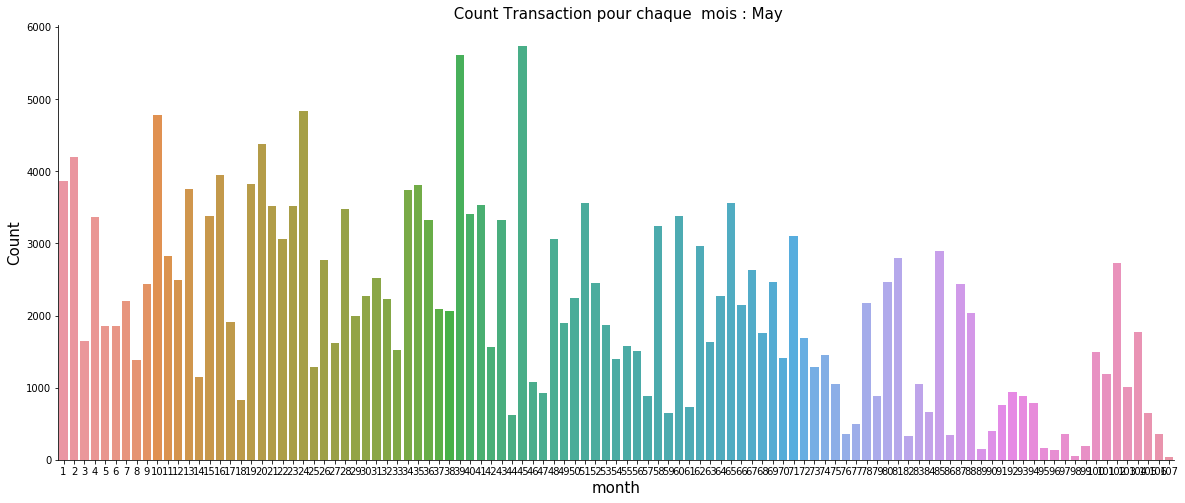

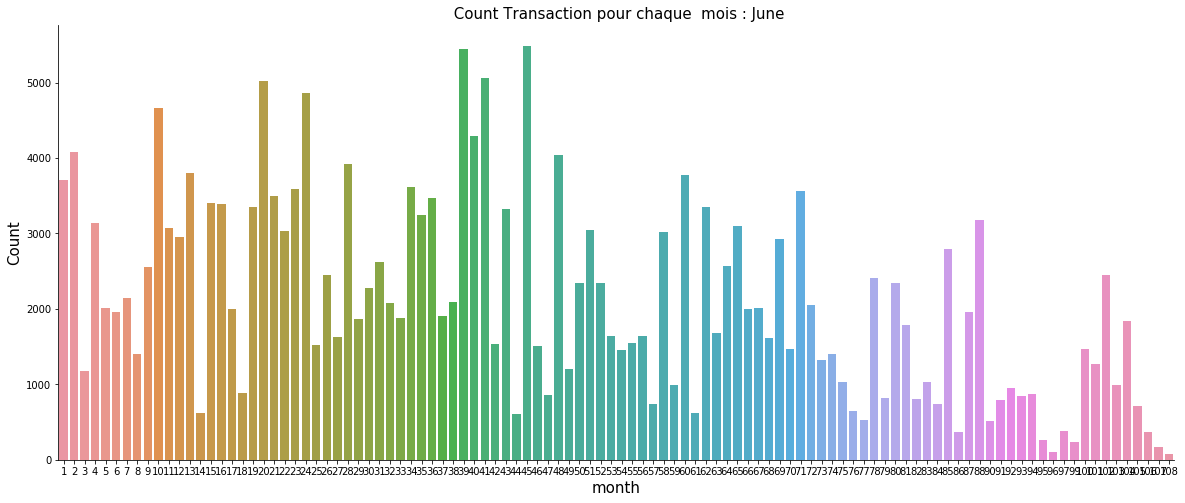

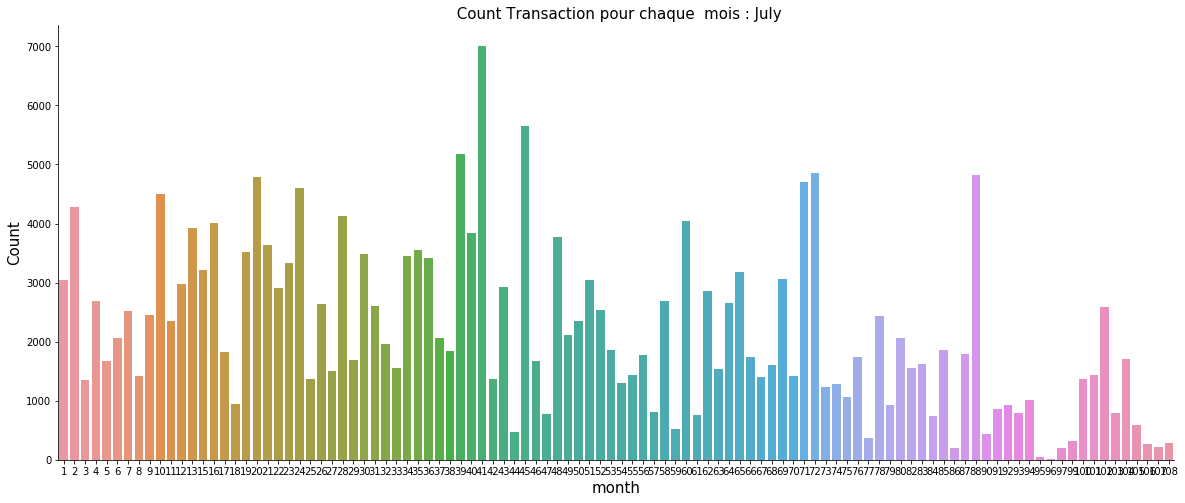

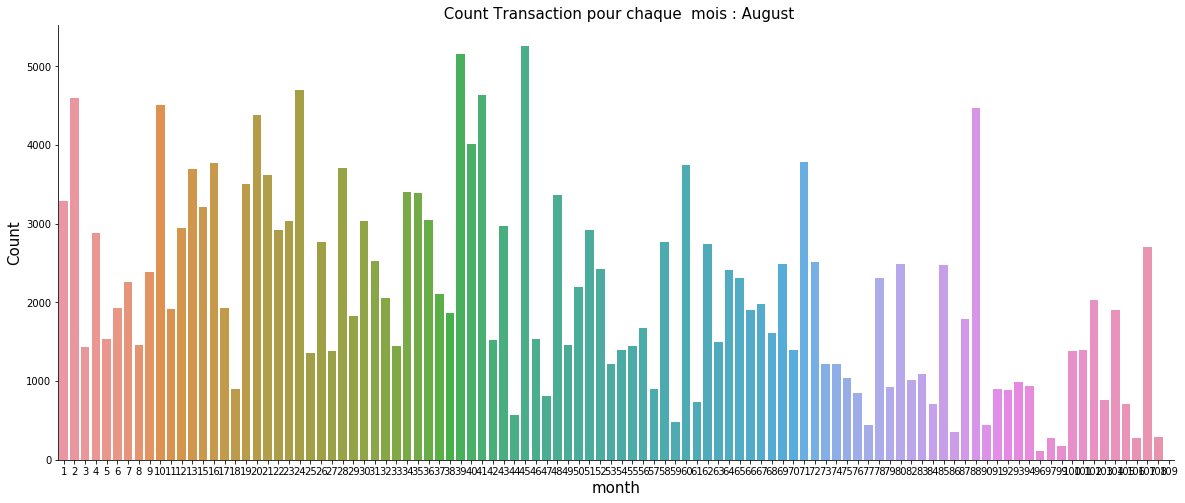

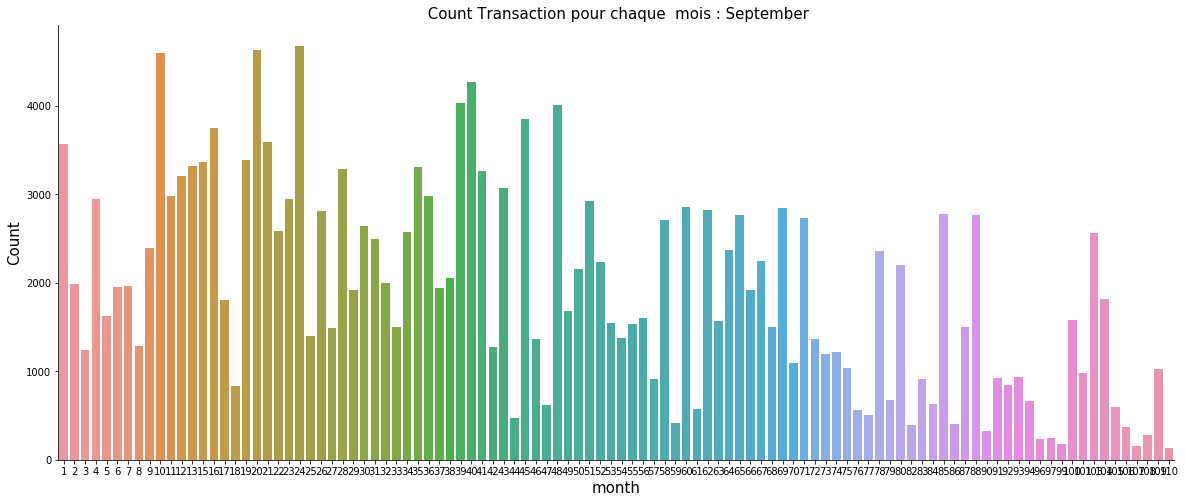

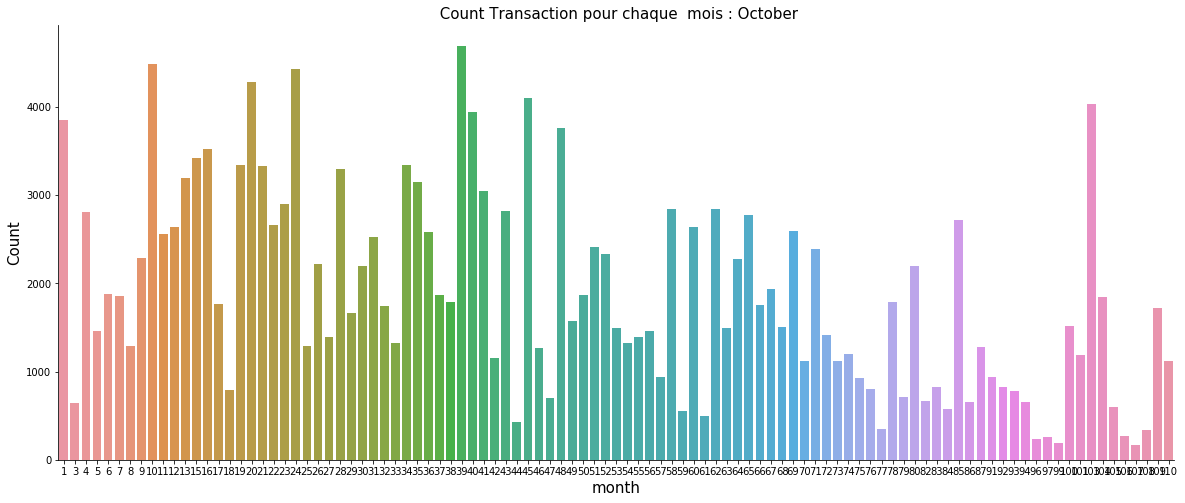

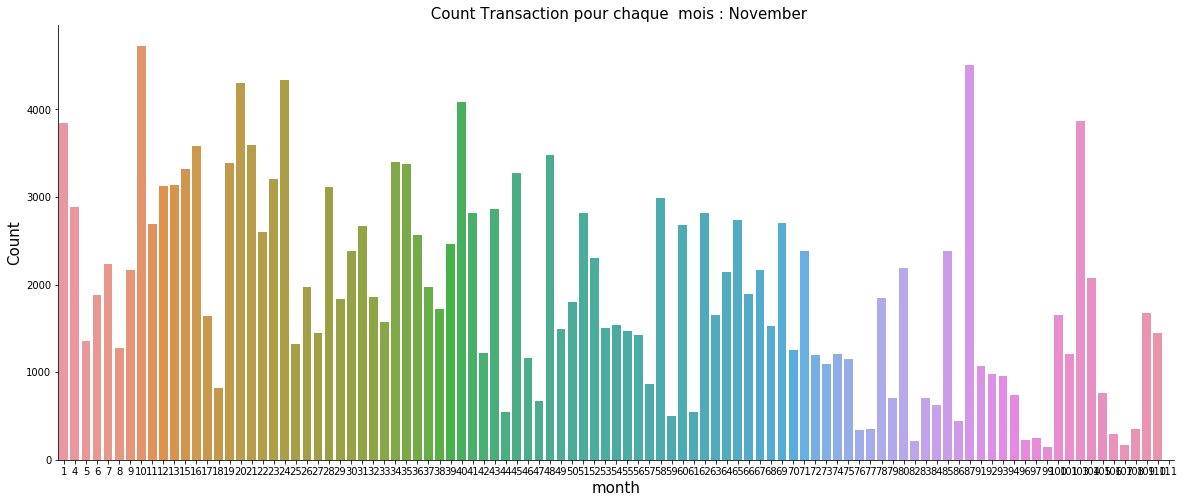

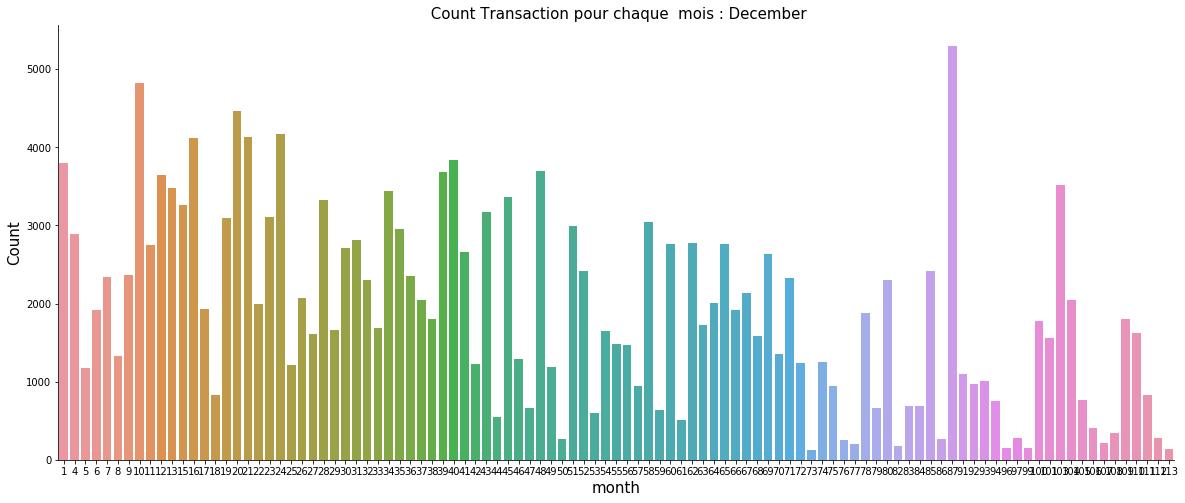

In [20]:
mm=Gab_Date['month'].unique()
for  m in mm :
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 8)
    sns.countplot(x = 'atm_id', data = Gab_Date[Gab_Date['month']==m])
    ax.set_xlabel('month', fontsize=15)
    ax.set_ylabel('Count', fontsize=15)
    ax.set_title(' Count Transaction pour chaque  mois : '+m, fontsize=15)
    sns.despine()


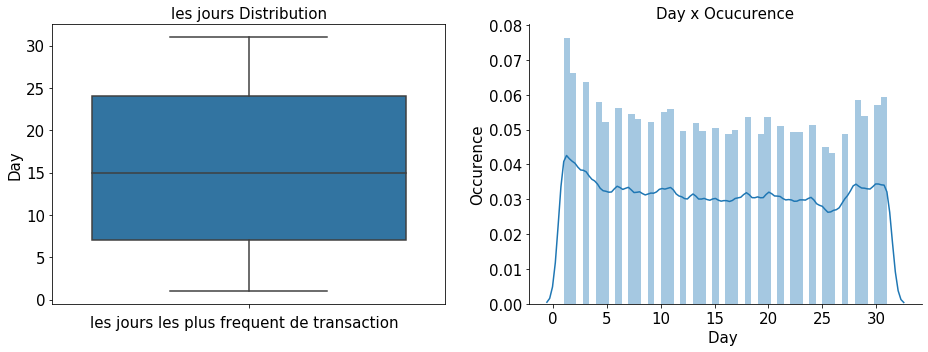

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'day', data = Gab_Date, orient = 'v', ax = ax1)
ax1.set_xlabel('les jours les plus frequent de transaction  ', fontsize=15)
ax1.set_ylabel('Day', fontsize=15)
ax1.set_title('les jours Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(Gab_Date['day'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Day ', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Day x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

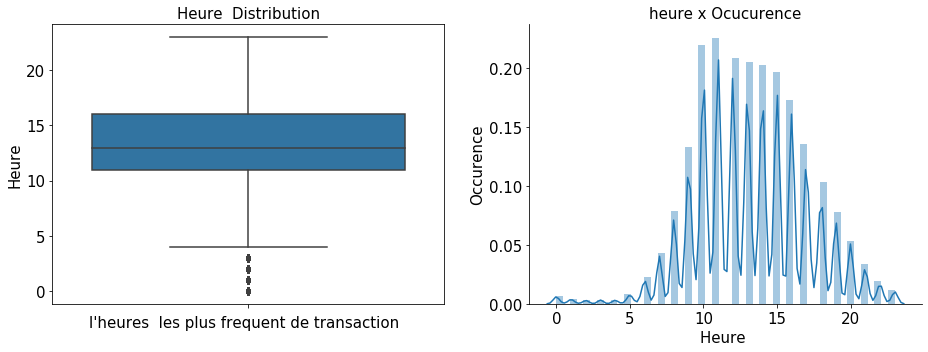

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'hour', data = Gab_Date, orient = 'v', ax = ax1)
ax1.set_xlabel('l\'heures  les plus frequent de transaction  ', fontsize=15)
ax1.set_ylabel('Heure', fontsize=15)
ax1.set_title('Heure  Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(Gab_Date['hour'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Heure ', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('heure x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

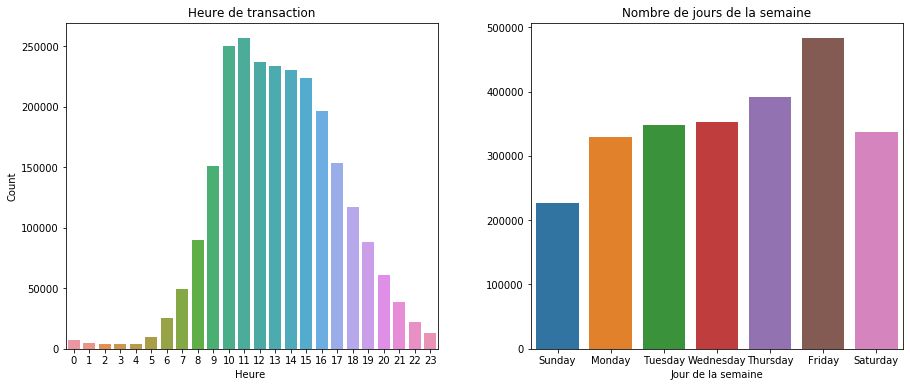

In [24]:
fig, (ax1, ax3) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
sns.countplot(Gab_Date['hour'], ax = ax1)
ax1.set_xlabel('Heure ', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Heure de transaction')
ax1.tick_params(labelsize=10)

sns.countplot(Gab_Date['weekday'], ax = ax3)
ax3.set_xlabel('Jour de la semaine', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Nombre de jours de la semaine')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

## Nous notons que les heures  entre  10 à 16 est une pression sur les GABs
## Nous notons également que le vendredi est le jour le plus utilisé de l'GAB

# Vérification la propagation des données sur le fichier CSV :

In [25]:
print('1 Quartile: ', Gab_Date['day'].quantile(q = 0.25))
print('2 Quartile: ', Gab_Date['day'].quantile(q = 0.50))
print('3 Quartile: ', Gab_Date['day'].quantile(q = 0.75))
print('4 Quartile: ', Gab_Date['day'].quantile(q = 1.00))

1 Quartile:  7.0
2 Quartile:  15.0
3 Quartile:  24.0
4 Quartile:  31.0


Conclusion sur les dates de transaction , à mon avis, en raison de la dispersion presque élevée et en regardant simplement ce graphique, nous ne pouvons pas conclure si le temps a un effet élevé sur notre variable y, nous devons continuer à rechercher un modèle. 


#  la relation entre la climat  et les transaction sur les  GABs


### Essayer de trouver des idées sur la meteo  :

Quelle est la météo appropriée pour retirer de l'argent au GAB?

In [5]:
Gab_Meteo=Gab.iloc[:,7:34]
Gab_Meteo=Gab_Meteo.drop(['weather_description','rain_3h','atm_location','atm_streetname'],axis=1)
Gab_Meteo=Gab_Meteo.drop(['weather_id','weather_city_id','message_code','message_text'],axis=1)
Gab_Meteo


,atm_id,atm_manufacturer,atm_street_number,atm_zipcode,atm_lat,atm_lon,currency,card_type,service,weather_lat,weather_lon,weather_city_name,temp,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main
0,1,NCR,8,4700,55.233423,11.763270,DKK,MasterCard,Withdrawal,55.229919,11.76092,Naestved,281.150,1014,87,7,260,92,Rain
1,2,NCR,20,9000,57.042838,9.950013,DKK,MasterCard,Withdrawal,57.048340,9.93520,Nørresundby,280.640,1020,93,9,250,92,Rain
2,2,NCR,20,9000,57.042838,9.950013,DKK,VISA,Withdrawal,57.048340,9.93520,Nørresundby,280.640,1020,93,9,250,92,Rain
3,3,NCR,12,7430,56.138585,9.153843,DKK,VISA,Withdrawal,56.138828,9.15768,Ikast,281.150,1011,100,6,240,75,Drizzle
4,4,NCR,1,4000,55.633564,12.017864,DKK,MasterCard,Withdrawal,55.641521,12.08035,Roskilde,280.610,1014,87,7,260,88,Mist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468567,49,NCR,18,9881,57.541253,10.199875,DKK,MasterCard,Withdrawal,57.471169,10.20312,Sindal,277.589,999,87,6,208,76,Clouds
2468568,12,NCR,12,9000,57.048515,9.921930,DKK,Mastercard - on-us,Withdrawal,57.048000,9.91870,Aalborg,277.589,999,87,6,208,76,Clouds
2468569,12,NCR,12,9000,57.048515,9.921930,DKK,Mastercard - on-us,Withdrawal,57.048000,9.91870,Aalborg,277.589,999,87,6,208,76,Clouds
2468570,10,NCR,6,9400,57.058677,9.922473,DKK,Mastercard - on-us,Withdrawal,57.048000,9.91870,Aalborg,277.589,999,87,6,208,76,Clouds


In [27]:
print('Null Values: ', Gab_Meteo.isnull().any())

Null Values:  atm_id               False
atm_manufacturer     False
atm_street_number    False
atm_zipcode          False
atm_lat              False
atm_lon              False
currency             False
card_type            False
service              False
weather_lat          False
weather_lon          False
weather_city_name    False
temp                 False
pressure             False
humidity             False
wind_speed           False
wind_deg             False
clouds_all           False
weather_main         False
dtype: bool


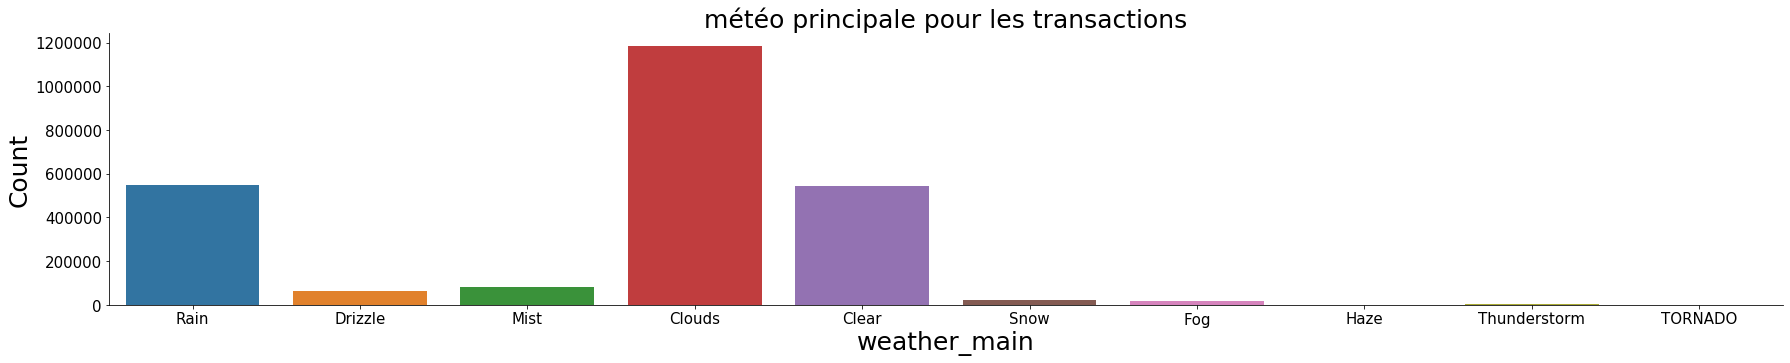

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 5)
sns.countplot(x = 'weather_main', data = Gab_Meteo)
ax.set_xlabel('weather_main', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('météo principale pour les transactions', fontsize=25)
ax.tick_params(labelsize=15)
sns.despine()


 ## Nous notons que le retrait en cas de météo nette et parfois avec la pluie

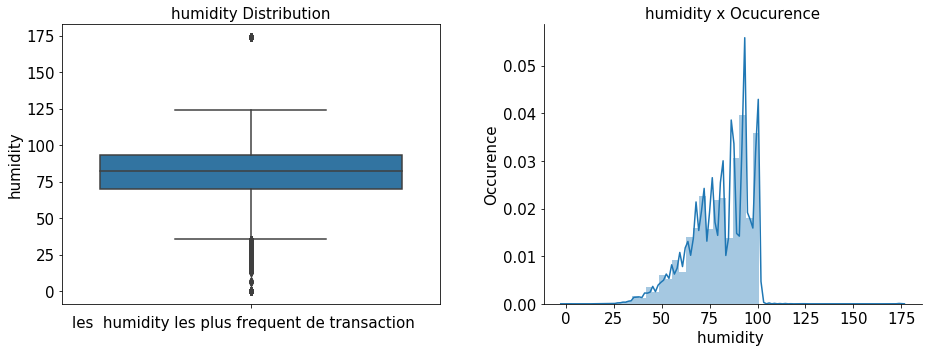

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'humidity', data = Gab_Meteo, orient = 'v', ax = ax1)
ax1.set_xlabel('les  humidity les plus frequent de transaction   ', fontsize=15)
ax1.set_ylabel('humidity', fontsize=15)
ax1.set_title('humidity Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(Gab_Meteo['humidity'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('humidity ', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('humidity x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

## Adapter les noms  villes des Gab :

In [6]:
Counter(Gab_Meteo['weather_city_name'])


"""
def changerVille(T):
    villes=['Fès','Rabat','Mohamadaia','Meknès','Marrakech','Tanger','Oujda','Casablanca','Tétouan','Agadir']
    tmp=0
    for i in T['weather_city_name'].unique():
        if tmp==10:
            tmp=0
        
        T['weather_city_name']=T['weather_city_name'].replace(to_replace=i, value=villes[tmp],regex=True)
        print(villes[tmp])
        tmp=tmp+1
        
    
    return T
"""
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Nørresundby', value='Rabat',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Ikast', value='Mohamadaia',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Roskilde', value='Meknès',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Nibe', value='Marrakech',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Fredericia', value='Tanger',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Hjallerup', value='Oujda',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Nykobing Mors', value='Casablanca',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Hadsund', value='Tétouan',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Aalborg', value='Agadir',regex=True)


Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Frederikshavn', value='Rabat',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Arhus', value='Rabat',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Skive', value='Mohamadaia',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Viborg', value='Meknès',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Kolding', value='Marrakech',regex=True)
print('===1=>')
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Hjorring', value='Tanger',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Vodskov', value='Oujda',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Hobro', value='Casablanca',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Odense', value='Tétouan',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Holbæk Kommune', value='Agadir',regex=True)
print('==2===>')
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Herning', value='Rabat',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Logstor', value='Rabat',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Slagelse', value='Mohamadaia',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Esbjerg', value='Meknès',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Vadum', value='Marrakech',regex=True)
print('===3==>')
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Abybro', value='Tanger',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Silkeborg', value='Oujda',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Svenstrup', value='Casablanca',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Greve Kommune', value='Tétouan',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Hirtshals', value='Agadir',regex=True)
print('===4==>')
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Hojslev', value='Fès',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Horsens', value='Rabat',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Storvorde', value='Mohamadaia',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Vejle', value='Meknès',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Tars', value='Marrakech',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Holstebro', value='Tanger',regex=True)
print('===5==>')
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Strandby', value='Oujda',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Kolind', value='Casablanca',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Svendborg', value='Tétouan',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Middelfart', value='Agadir',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Copenhagen', value='Fès',regex=True)

print('===6==>')

Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Skagen', value='Taza',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Vinderup', value='Sale',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Aars', value='Safi',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Kongens Lyngby', value='Nador',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Helsingor', value='Housima',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Frederiksberg', value='Ifran',regex=True)
print('===5==>')
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Sindal', value='sidi kasam',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Gistrup', value='Asila',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Farso', value='Jadida',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Stovring', value='Mouhamadia',regex=True)
Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Gladsakse Kommune', value='Casablanca',regex=True)

Gab_Meteo['weather_city_name']=Gab_Meteo['weather_city_name'].replace(to_replace='Naestved', value='Casablanca',regex=True)


===1=>
==2===>
===3==>
===4==>
===5==>
===6==>
===5==>


In [31]:
Gab_Meteo['weather_city_name'].unique()

array(['Casablanca', 'Rabat', 'Mohamadaia', 'Meknès', 'Marrakech',
       'Tanger', 'Oujda', 'Tétouan', 'Agadir', 'Taza', 'Sale', 'Safi',
       'Nador', 'Housima', 'Ifran', 'sidi kasam', 'Asila', 'Jadida',
       'Mouhamadia', 'Fès'], dtype=object)

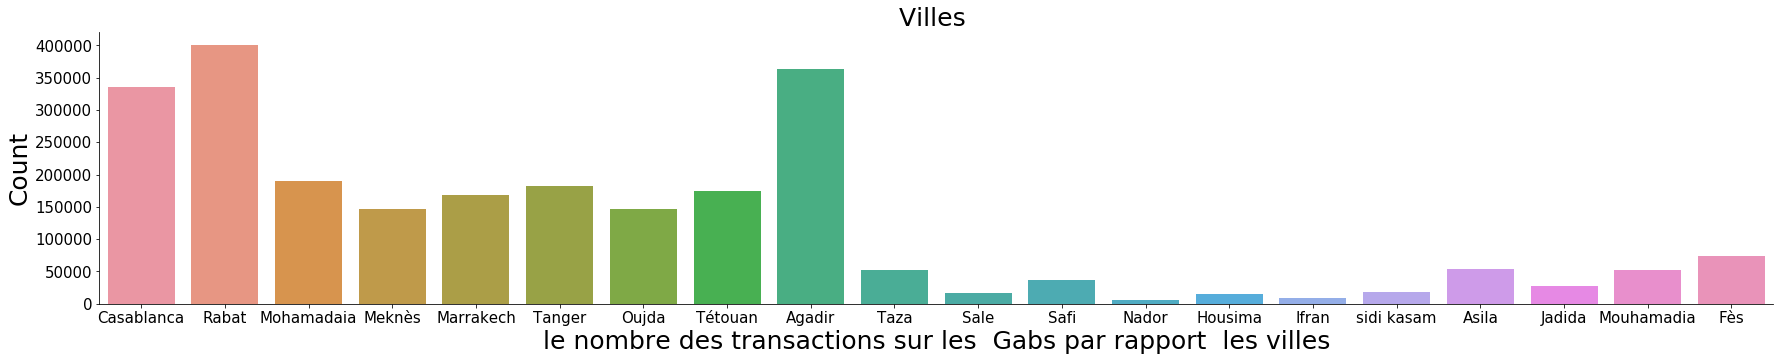

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 5)

sns.countplot(x = 'weather_city_name', data = Gab_Meteo)
ax.set_xlabel('le nombre des transactions sur les  Gabs par rapport  les villes', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Villes ', fontsize=25)
ax.tick_params(labelsize=15)
sns.despine()

 # Preprocessing Gab Date :

In [10]:
Gab_Date

,year,month,day,weekday,hour,atm_status,atm_id
0,2017,January,1,Sunday,0,Active,1
1,2017,January,1,Sunday,0,Inactive,2
2,2017,January,1,Sunday,0,Inactive,2
3,2017,January,1,Sunday,0,Inactive,3
4,2017,January,1,Sunday,0,Active,4
...,...,...,...,...,...,...,...
2468567,2017,December,31,Sunday,23,Active,49
2468568,2017,December,31,Sunday,23,Inactive,12
2468569,2017,December,31,Sunday,23,Inactive,12
2468570,2017,December,31,Sunday,23,Active,10


# Transfomation les mots  ==> chiffre 

In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
Gab_Date['atm_status']     = labelencoder_X.fit_transform(Gab_Date['atm_status']) 
Gab_Date['weekday']       = labelencoder_X.fit_transform(Gab_Date['weekday']) 
Gab_Date['month'] = labelencoder_X.fit_transform(Gab_Date['month']) 



In [9]:
Gab_Meteo

,atm_id,atm_manufacturer,atm_street_number,atm_zipcode,atm_lat,atm_lon,currency,card_type,service,weather_lat,weather_lon,weather_city_name,temp,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main
0,1,NCR,8,4700,55.233423,11.763270,DKK,MasterCard,Withdrawal,55.229919,11.76092,Casablanca,281.150,1014,87,7,260,92,Rain
1,2,NCR,20,9000,57.042838,9.950013,DKK,MasterCard,Withdrawal,57.048340,9.93520,Rabat,280.640,1020,93,9,250,92,Rain
2,2,NCR,20,9000,57.042838,9.950013,DKK,VISA,Withdrawal,57.048340,9.93520,Rabat,280.640,1020,93,9,250,92,Rain
3,3,NCR,12,7430,56.138585,9.153843,DKK,VISA,Withdrawal,56.138828,9.15768,Mohamadaia,281.150,1011,100,6,240,75,Drizzle
4,4,NCR,1,4000,55.633564,12.017864,DKK,MasterCard,Withdrawal,55.641521,12.08035,Meknès,280.610,1014,87,7,260,88,Mist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468567,49,NCR,18,9881,57.541253,10.199875,DKK,MasterCard,Withdrawal,57.471169,10.20312,sidi kasam,277.589,999,87,6,208,76,Clouds
2468568,12,NCR,12,9000,57.048515,9.921930,DKK,Mastercard - on-us,Withdrawal,57.048000,9.91870,Agadir,277.589,999,87,6,208,76,Clouds
2468569,12,NCR,12,9000,57.048515,9.921930,DKK,Mastercard - on-us,Withdrawal,57.048000,9.91870,Agadir,277.589,999,87,6,208,76,Clouds
2468570,10,NCR,6,9400,57.058677,9.922473,DKK,Mastercard - on-us,Withdrawal,57.048000,9.91870,Agadir,277.589,999,87,6,208,76,Clouds


2.1 Month, Day of Week treatment

In [8]:
#Gab_Meteo=Gab_Meteo.drop(['weather_city_id','weather_city_id','weather_id'],axis=1)
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
Gab_Meteo['atm_manufacturer']= labelencoder_X.fit_transform(Gab_Meteo['atm_manufacturer'])
Gab_Meteo['currency']= labelencoder_X.fit_transform(Gab_Meteo['currency'])
Gab_Meteo['service']= labelencoder_X.fit_transform(Gab_Meteo['service'])
Gab_Meteo['card_type']= labelencoder_X.fit_transform(Gab_Meteo['card_type'])
Gab_Meteo['weather_city_name']= labelencoder_X.fit_transform(Gab_Meteo['weather_city_name'])
Gab_Meteo['weather_main']= labelencoder_X.fit_transform(Gab_Meteo['weather_main'])
Gab_Meteo

,atm_id,atm_manufacturer,atm_street_number,atm_zipcode,atm_lat,atm_lon,currency,card_type,service,weather_lat,weather_lon,weather_city_name,temp,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main
0,1,1,8,4700,55.233423,11.763270,0,6,0,55.229919,11.76092,2,281.150,1014,87,7,260,92,6
1,2,1,20,9000,57.042838,9.950013,0,6,0,57.048340,9.93520,13,280.640,1020,93,9,250,92,6
2,2,1,20,9000,57.042838,9.950013,0,8,0,57.048340,9.93520,13,280.640,1020,93,9,250,92,6
3,3,1,12,7430,56.138585,9.153843,0,8,0,56.138828,9.15768,9,281.150,1011,100,6,240,75,2
4,4,1,1,4000,55.633564,12.017864,0,6,0,55.641521,12.08035,8,280.610,1014,87,7,260,88,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468567,49,1,18,9881,57.541253,10.199875,0,6,0,57.471169,10.20312,19,277.589,999,87,6,208,76,1
2468568,12,1,12,9000,57.048515,9.921930,0,7,0,57.048000,9.91870,0,277.589,999,87,6,208,76,1
2468569,12,1,12,9000,57.048515,9.921930,0,7,0,57.048000,9.91870,0,277.589,999,87,6,208,76,1
2468570,10,1,6,9400,57.058677,9.922473,0,7,0,57.048000,9.91870,0,277.589,999,87,6,208,76,1


## Visualisation CashIN :

Text(0, 0.5, 'Cash IN')

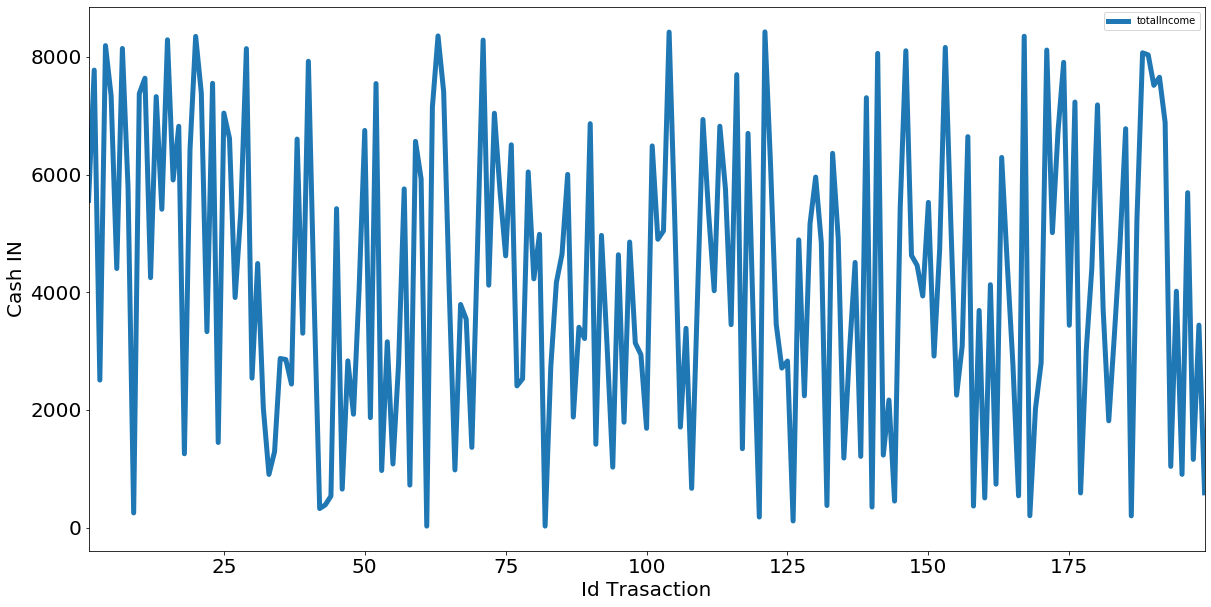

In [10]:
Gab_Argent=Gab.iloc[:,34:38]

Y=Gab.iloc[:200,37:38]

Y[1:200].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Id Trasaction', fontsize=20)
plt.ylabel('Cash IN', fontsize=20)


## Concaténation :

In [11]:
#Gab_Meteo=Gab_Meteo.drop(['atm_id'],axis=1)
Gab_final= pd.concat([Gab_Date, Gab_Meteo, Gab_Argent], axis = 1)
#Gab_final=Gab_final.drop(['atm_id'],axis=1)

##  Un guide approximatif pour classer la précision des Gabs:

.0 =  Gab excellent (A)

.1 =  Gab bien (B)

.2 = Gab assez bien (C)

.3 = Gab pauvres (D)

.4  = GAb perdre (E)

.5  = Gab tree perdre (F)

.6  = Gab   inacceptable (I)

In [12]:
YLabel=[]
for j in Gab_final['totalBalance']:
    if j < 2000:
        YLabel.append(0)
    if j < 4000 and j >= 2000:
        YLabel.append(1)
    if j < 6000 and j >= 4000:
        YLabel.append(2)
    if j < 8000 and j >= 6000:
        YLabel.append(3)    
    if j < 10000 and j >= 8000:
        YLabel.append(4)        
    if j < 20000 and j >= 10000:
        YLabel.append(5)
    if j >=20000:
        YLabel.append(6)
        
    

In [18]:
YLabel1=[]
for j in Gab_final['totalBalance']:    
    if j >=20000:
        YLabel1.append(1)
    if j <20000:
        YLabel1.append(0)
    

In [16]:
Counter(YLabel)

Counter({6: 1602796,
         5: 433687,
         1: 86206,
         2: 86521,
         3: 86329,
         0: 86173,
         4: 86860})

In [13]:
Gab_final['labelClassification']=YLabel
#Gab_final.to_csv(r'BAO.csv')

In [21]:
#Gab_final['labelClassificationROC']=YLabel1
#Gab_final.drop('labelClassificationROC',axis=1)

# Vérification la propagation des données sur le fichier CSV :

In [18]:

print('1 Quartile: ', Gab_final['totalBalance'].quantile(q = 0.25))
print('2 Quartile: ', Gab_final['totalBalance'].quantile(q = 0.50))
print('3 Quartile: ', Gab_final['totalBalance'].quantile(q = 0.75))
print('4 Quartile: ', Gab_final['totalBalance'].quantile(q = 1.00))


1 Quartile:  14265.0
2 Quartile:  28515.0
3 Quartile:  42766.0
4 Quartile:  57049.0


# Les valeurs aberrantes :

In [20]:
print('Nombre de valeurs aberrantes : ', Gab_final[Gab_final['totalBalance'] > 20000]['totalBalance'].count())
print('Total d\'argent   aberrantes : ', Gab_final[Gab_final['totalBalance'] > 20000]['totalBalance'].sum())
print('Nombre des transaction total : ', len(Gab_final))

print('Les valeurs aberrantes sont:', round(Gab_final[Gab_final['totalBalance'] > 20000]['totalBalance'].count()*100/len(Gab_final),2), '%')

Nombre de valeurs aberrantes :  1602752
Total d'argent   aberrantes :  61732381635
Nombre des transaction total :  2468572
Les valeurs aberrantes sont: 64.93 %


# il existe un grand pourcentage de distributeurs automatiques de billets qui acceptent beaucoup d'argent sans les utiliser

In [21]:
#Calcul de quelques valeurs pour évaluer cette variable indépendante
print('la moyenne :', round(Gab_final['totalBalance'].mean(), 1))
# Un faible écart-type indique que les points de données ont tendance à être proches de la valeur moyenne ou attendue
# écart-type élevé indique que les points de données sont dispersés
print('STD :', round(Gab_final['totalBalance'].std(), 1))
# Je pense que la meilleure façon de donner un aperçu précis de la dispersion est d'utiliser le CV (variation de coefficient) (STD / MEAN) * 100
# Cv <15%, une faible dispersion
# Cv> 30%, dispersion élevée
print('CV  :',round(Gab_final['totalBalance'].std()*100/Gab_final['totalBalance'].mean(), 1), ',Dispersion moyenne élevée')

la moyenne : 28519.2
STD : 16460.2
CV  : 57.7 ,Dispersion moyenne élevée


# Prendre les transactions d'une balance mois de 20000 DH pour faire l'appretissage 
### objectif est  prendre  la décision à partir  l'historique des GABs qui contient d'une  balance <20000 .

In [14]:
Gab_final=Gab_final[Gab_final['totalBalance'] < 20000] # supprimier les valeurs aberrantes pour faire l'apprentissage 
#Gab_final.to_csv(r'Hada1.csv')

In [15]:
X_train


NameError: name 'X_train' is not defined

k=1 97.18 (+/- 2.01)
k=2 96.64 (+/- 1.77)
k=3 97.64 (+/- 1.01)
k=4 97.18 (+/- 1.38)
k=5 97.45 (+/- 0.98)
k=6 97.00 (+/- 1.52)
k=7 96.91 (+/- 0.93)
k=8 97.09 (+/- 1.21)
k=9 97.09 (+/- 1.14)
k=10 96.73 (+/- 1.36)
k=11 97.00 (+/- 1.00)
k=12 97.09 (+/- 0.98)
k=13 96.73 (+/- 1.53)
k=14 96.91 (+/- 0.93)
k=15 96.82 (+/- 1.24)
k=16 96.91 (+/- 1.16)
k=17 97.09 (+/- 1.06)
k=18 96.73 (+/- 1.53)
k=19 96.64 (+/- 1.52)
k=20 96.82 (+/- 1.53)
k=21 96.64 (+/- 1.87)
k=22 96.18 (+/- 1.56)
k=23 96.64 (+/- 1.29)
k=24 96.09 (+/- 1.15)
k=25 95.91 (+/- 1.64)
Le nombre optimal de voisins est 2 with 97.6%


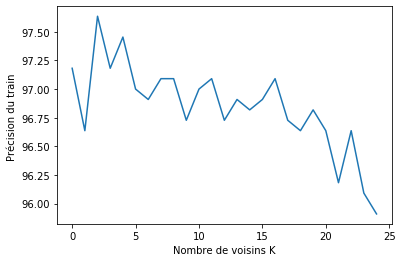

In [91]:
from sklearn import decomposition


from sklearn import decomposition

# Create a pca object with the  components as a parameter
pca = decomposition.PCA(n_components=23)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(Gab_final.iloc[:,:28])
D=pd.DataFrame(X_std_pca)
D

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(D.iloc[:2200,:25],Gab_final.iloc[:2200,-1], test_size = 0.5, random_state = 101)

#Voisines
neighbors = np.arange(0,25)

#Créer une liste vide qui contiendra les scores de cv
cv_scores = []

#Effectuez une validation croisée 10 fois sur l'ensemble d'apprentissage pour les valeurs impaires de k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("Le nombre optimal de voisins est %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Nombre de voisins K')
plt.ylabel('Précision du train ')
plt.show()

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
f1_KNNCV=f1_score(y_test, knnpred, average='macro')
Recall_KNNCV=recall_score(y_test, knnpred, average='macro')
print('La matrice de confusion KNN : \n',confusion_matrix(y_test, knnpred))
print('Accuracy pour KNN :\n',round(accuracy_score(y_test, knnpred),2)*100)
print('F1-Score est :',f1_KNNCV)
print('Recall est :',Recall_KNNCV)

La matrice de confusion KNN : 
 [[ 96   4   0   0   0   0]
 [  2 108   2   0   0   0]
 [  0  10 106   2   0   0]
 [  0   0   2  98   1   0]
 [  0   0   0   2 109   5]
 [  0   0   0   0   5 548]]
Accuracy pour KNN :
 97.0
F1-Score est : 0.9537995079932639
Recall est : 0.9539169016380281


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(D.iloc[:700,:25],Gab_final.iloc[:700,-1], test_size = 0.3, random_state = 101)

from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

print(X_train.shape)

(490, 23)


In [29]:
Counter(y_train)

Counter({4: 603, 5: 3282, 1: 622, 0: 670, 2: 616, 3: 653})

In [20]:

X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
3204,1410.297471,-1102.926653,-7.517677,-65.482302,-15.153507,42.973890,29.506245,9.155026,0.716277,-13.375549,8.163035,3.567417,6.118112,0.670521,-0.783478,1.754086,-2.350266,-0.526014,-0.106717,0.043953
508,-3042.723900,-673.014242,-15.807674,-100.643117,-39.220181,8.425803,-12.551896,6.161544,-0.564612,-14.948854,8.879268,-4.365038,-0.734208,-0.244838,-0.301789,5.624162,-0.049728,-0.812612,-0.272889,0.092781
3964,6194.916083,6777.341548,-2.356477,-13.042666,64.118118,-24.916666,1.456029,10.684161,5.610984,-14.238486,4.244913,-0.417759,-0.063537,-1.429822,1.414404,3.823047,-2.014688,1.582769,-1.653913,-0.810027
6126,-6491.690820,-1373.422628,-47.441931,184.022342,11.325171,-5.847877,3.554198,-41.516557,6.049211,-9.983149,13.727973,7.308566,-2.667925,0.108997,2.905778,-2.529876,-2.571048,2.799452,-0.554555,0.013763
7685,6497.320343,-1572.951975,-6.056941,132.319921,-6.651639,24.472190,41.559998,-20.774727,-18.075853,-9.672528,11.855367,14.687013,0.620241,1.871075,-0.909066,0.571452,-1.465714,4.985590,-1.445127,-0.127644


# Normalisation à l'aide de Scaler  :

In [46]:

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Classification 

# Classifieur KNeighborsClassifier

In [81]:
X_train, X_test, y_train, y_test =  train_test_split(Gab_final.iloc[:1100,:25],Gab_final.iloc[:1100,-1], test_size = 0.3, random_state = 101)


k=1 28.05 (+/- 4.20)
k=2 17.79 (+/- 4.58)
k=3 28.31 (+/- 4.42)
k=4 33.77 (+/- 4.93)
k=5 35.71 (+/- 3.30)
k=6 38.18 (+/- 4.80)
k=7 42.08 (+/- 6.42)
k=8 44.03 (+/- 6.10)
k=9 44.81 (+/- 5.73)
k=10 45.84 (+/- 7.39)
k=11 46.75 (+/- 7.04)
k=12 46.62 (+/- 7.17)
k=13 46.88 (+/- 6.68)
k=14 47.66 (+/- 5.57)
k=15 47.53 (+/- 5.61)
k=16 48.70 (+/- 5.90)
k=17 50.00 (+/- 5.46)
k=18 49.61 (+/- 5.68)
k=19 50.39 (+/- 5.95)
k=20 50.26 (+/- 6.07)
k=21 50.78 (+/- 5.94)
k=22 50.91 (+/- 5.83)
k=23 51.17 (+/- 6.07)
k=24 51.04 (+/- 6.18)
k=25 51.30 (+/- 6.21)
Le nombre optimal de voisins est 24 with 51.3%


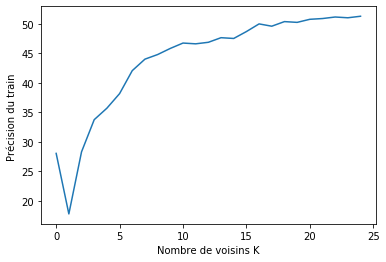

In [82]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier


#Voisines
neighbors = np.arange(0,25)

#Créer une liste vide qui contiendra les scores de cv
cv_scores = []

#Effectuez une validation croisée 10 fois sur l'ensemble d'apprentissage pour les valeurs impaires de k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("Le nombre optimal de voisins est %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Nombre de voisins K')
plt.ylabel('Précision du train ')
plt.show()

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
f1_KNNCV=f1_score(y_test, knnpred, average='macro')
Recall_KNNCV=recall_score(y_test, knnpred, average='macro')
print('La matrice de confusion KNN : \n',confusion_matrix(y_test, knnpred))
print('Accuracy pour KNN :\n',round(accuracy_score(y_test, knnpred),2)*100)
print('F1-Score est :',f1_KNNCV)
print('Recall est :',Recall_KNNCV)

La matrice de confusion KNN : 
 [[  0   0   1   0   0  31]
 [  0   0   2   1   0  31]
 [  0   0   0   0   0  32]
 [  0   0   0   0   0  26]
 [  0   0   3   0   0  37]
 [  0   0   5   2   0 159]]
Accuracy pour KNN :
 48.0
F1-Score est : 0.1099585062240664
Recall est : 0.15963855421686748


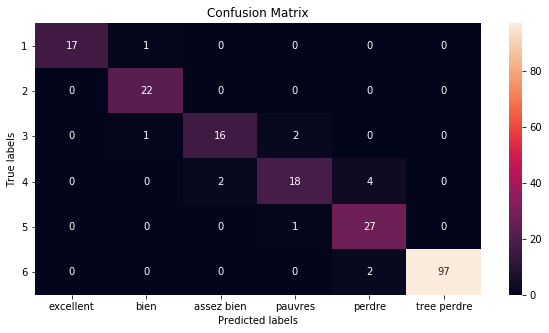

In [34]:


from sklearn.metrics import confusion_matrix

columns = ['excellent', 'bien','assez bien','pauvres','perdre','tree perdre']
cm = confusion_matrix(y_test, knnpred)

df_cm = pd.DataFrame(cm, index=columns, columns=columns)

import seaborn as sns
import matplotlib.pyplot as plt   
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(10,5))
sns.heatmap(df_cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.yaxis.set_ticklabels(['1', '2','3','4','5','6']);
ax.xaxis.set_ticklabels(['excellent', 'bien','assez bien','pauvres','perdre','tree perdre']);



In [37]:
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print('Knn + cross Validation : ',KNNCV*100,'%')

Knn + cross Validation :  92.65306122448979 %


# Classifieur SVM Kernel : f° d'activation  Sigmoid

La matrice de confusion SVM :
 [[ 90   5   0   0   0   0]
 [  0  92   8   0   0   0]
 [  0   2  98   1   0   0]
 [  0   0   1  90   0   0]
 [  0   0   0   0 106   0]
 [  0   0   0   0   4 503]]
Accuracy pour SVM :
 98.0
SVM + CrossValidation : 97.80000000000001 %
F1-Score est : 0.9677393092185702
Recall est : 0.969797815569251


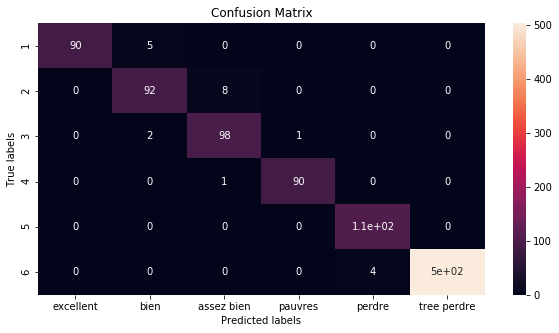

In [77]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)


f1_SVCCV=f1_score(y_test, svcpred,average='macro')
Recall_SVCCV=recall_score(y_test, svcpred, average='macro')

print('La matrice de confusion SVM :\n',confusion_matrix(y_test, svcpred))
print('Accuracy pour SVM :\n',round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print('SVM + CrossValidation :',SVCCV *100,'%')
print('F1-Score est :',f1_SVCCV)
print('Recall est :',Recall_SVCCV)

cm = confusion_matrix(y_test, svcpred)


import seaborn as sns
import matplotlib.pyplot as plt   
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.yaxis.set_ticklabels(['1', '2','3','4','5','6']);
ax.xaxis.set_ticklabels(['excellent', 'bien','assez bien','pauvres','perdre','tree perdre']);



# Classifieur DecisionTree

In [78]:
#X_train, X_test, y_train, y_test =  train_test_split(D.iloc[:8000,:20],Gab_final.iloc[:8000,-1], test_size = 0.4, random_state = 101)



from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',splitter='random') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

f1_DTREECV=f1_score(y_test, dtreepred,average='macro')
Recall_DTREECV=recall_score(y_test, dtreepred, average='macro')

print('La matrice de confusion DecisionTree :\n',confusion_matrix(y_test, dtreepred,))
print('Accuracy pour DecisionTree :\n',round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print('DecisionTree + CrossValidation :',DTREECV *100,'%')

print('\n F1-Score est :',f1_DTREECV)
print('Recall est :',Recall_DTREECV)



La matrice de confusion DecisionTree :
 [[ 92   3   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0   1  97   3   0   0]
 [  0   0   4  87   0   0]
 [  0   0   0   0 106   0]
 [  0   0   0   0   0 507]]
Accuracy pour DecisionTree :
 99.0
DecisionTree + CrossValidation : 97.6 %

 F1-Score est : 0.9810118970948118
Recall est : 0.9808101747132492


# Classifieur RandomFores

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, criterion='entropy')#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

f1_RFCCV=f1_score(y_test, rfcpred,average='macro')
Recall_RFCCV=recall_score(y_test, rfcpred, average='macro')

print('La matrice de confusion RandomFores :\n',confusion_matrix(y_test, rfcpred ))
print('Accuracy pour RandomFores :\n',round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print('RandomFores + CrossValidation :',RFCCV *100,'%')


print('\n F1-Score est :',f1_RFCCV)
print('Recall est :',Recall_RFCCV)

La matrice de confusion RandomFores :
 [[ 76  16   3   0   0   0]
 [  6  88   6   0   0   0]
 [  2   9  86   3   1   0]
 [  0   3   2  78   8   0]
 [  0   0   2  12  92   0]
 [  0   0   0   0   0 507]]
Accuracy pour RandomFores :
 93.0
RandomFores + CrossValidation : 90.69999999999997 %

 F1-Score est : 0.876781966972235
Recall est : 0.876092088993266


# Classifieur GaussianNB

In [80]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB( priors=None, var_smoothing=1e-09)
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

f1_GAUSIAN=f1_score(y_test, gaussiannbpred,average='macro')
Recall_GAUSIAN=recall_score(y_test, gaussiannbpred, average='macro')

print('La matrice de confusion GaussianNB :\n',confusion_matrix(y_test, gaussiannbpred ))
print('Accuracy pour GaussianNB :\n',round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print('GaussianNB + CrossValidation :',GAUSIAN *100,'%')


print('\n F1-Score est :',f1_GAUSIAN)
print('Recall est :',Recall_GAUSIAN)


La matrice de confusion GaussianNB :
 [[ 86   9   0   0   0   0]
 [  3  92   5   0   0   0]
 [  0   6  91   4   0   0]
 [  0   0   6  81   4   0]
 [  0   0   0   2  94  10]
 [  0   0   0   0   2 505]]
Accuracy pour GaussianNB :
 95.0
GaussianNB + CrossValidation : 93.6 %

 F1-Score est : 0.9218692095869626
Recall est : 0.9165351377781956


# Classifieur XGBClassifier :

In [59]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)
f1_XGB=f1_score(y_test, xgbprd,average='macro')
Recall_XGB=recall_score(y_test, xgbprd, average='macro')

print('La matrice de confusion XGBC :\n',confusion_matrix(y_test, xgbprd ))
print('Accuracy pour XGBC :\n',round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())
print('XGBC + CrossValidation :',XGB *100,'%')

print('\n F1-Score est :',f1_XGB)
print('Recall est :',Recall_XGB)

La matrice de confusion XGBC :
 [[ 20   0   0   0   0   0]
 [  0  26   0   0   0   0]
 [  0   0  25   0   0   0]
 [  0   0   0  20   1   0]
 [  0   0   0   0  28   0]
 [  0   0   0   0   0 130]]
Accuracy pour XGBC :
 100.0
XGBC + CrossValidation : 99.2 %

 F1-Score est : 0.9930109827414064
Recall est : 0.9920634920634921


# Classifieur GradientBoosting :

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)


f1_GBKCV=f1_score(y_test, gbkpred,average='macro')
Recall_GBKCV=recall_score(y_test, gbkpred, average='macro')

print('La matrice de confusion GradientBoosting :\n',confusion_matrix(y_test, gbkpred ))
print('Accuracy pour GradientBoosting :\n',round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print('GBKCV + CrossValidation :',GBKCV *100,'%')

print('\n F1-Score est :',f1_GBKCV)
print('Recall est :',Recall_GBKCV)

La matrice de confusion GradientBoosting :
 [[ 20   0   0   0   0   0]
 [  0  26   0   0   0   0]
 [  0   0  25   0   0   0]
 [  0   0   0  20   1   0]
 [  0   0   0   0  28   0]
 [  0   0   0   0   0 130]]
Accuracy pour GradientBoosting :
 100.0
GBKCV + CrossValidation : 99.2 %

 F1-Score est : 0.9930109827414064
Recall est : 0.9920634920634921


In [61]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV,DTREECV,SVCCV,KNNCV,GAUSIAN,XGB,GBKCV],

                'F1-score':  [f1_RFCCV,f1_DTREECV,f1_SVCCV,f1_KNNCV,f1_GAUSIAN,f1_XGB,f1_GBKCV],
                'Recall': [Recall_RFCCV,Recall_DTREECV,Recall_SVCCV,Recall_KNNCV,Recall_GAUSIAN,Recall_XGB,Recall_GBKCV]
})


models.sort_values(by='Score', ascending=False)


,Models,Score,F1-score,Recall
5,XGBoost,0.992000,0.993011,0.992063
6,Gradient Boosting,0.992000,0.993011,0.992063
3,K-Near Neighbors,0.926531,0.917193,0.921760
1,Decision Tree Classifier,0.920000,0.750731,0.739481
2,Support Vector Machine,0.904000,0.924472,0.923022
4,Gausian NB,0.816000,0.862967,0.839005
0,Random Forest Classifier,0.708000,0.565648,0.563034


In [130]:
Counter(y_test)

Counter({4: 42, 5: 170, 1: 36, 3: 33, 0: 35, 2: 34})

## Courbe ROC et  aire sous la courbe ROC  ( ROC / AUC  ):

Une courbe ROC (receiver operating characteristic) est un graphique représentant les performances d'un modèle de classification pour tous les seuils de classification. Cette courbe trace le taux de vrais positifs en fonction du taux de faux positifs :

AUC signifie "aire sous la courbe ROC". Cette valeur mesure l'intégralité de l'aire à deux dimensions située sous l'ensemble de la courbe ROC (par calculs d'intégrales) de (0,0) à (1,1).

In [68]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import metrics

probs1 = svc.predict_proba(X_test)
preds = probs[:,3]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y[:,3], preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

AttributeError: predict_proba is not available when  probability=False

AttributeError: predict_proba is not available when  probability=False

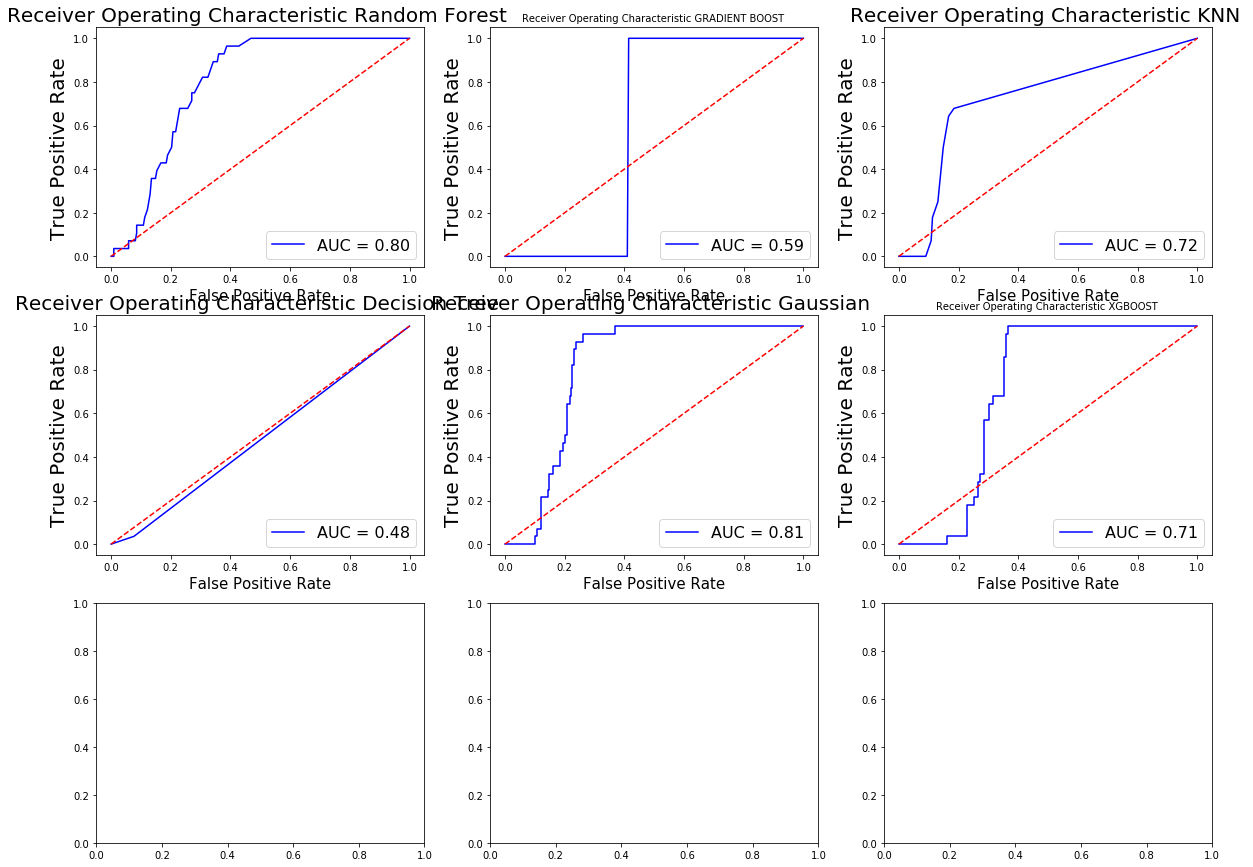

In [66]:
from sklearn.preprocessing import label_binarize

y = label_binarize(y_test, classes=[0,1,2,4,5])
n_classes = 5
fig, ax_arr = plt.subplots(nrows = 3, ncols = 3, figsize = (20,15))
"""

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,5]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y[:,4], preds[:,4])
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})
"""

l=3
#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,3]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y[:,l], preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,0].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,3]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y[:,l], preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,3]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y[:,l], preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,3]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y[:,l], preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#----------------- XGBOOST--------------------
probs = xgb.predict_proba(X_test)
preds = probs[:,3]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y[:,l], preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax_arr[1,2].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,2].plot([0, 1], [0, 1],'r--')
ax_arr[1,2].set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,3]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y[:,l], preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax_arr[0,1].plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#SVM 
probs = svc.predict_proba(X_test)
preds = probs[:,3]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y[:,l], preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax_arr[0,2].plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic SVM ',fontsize=10)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#----------------------------------
ax_arr[2,1].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[2,1].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[2,1].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[2,1].plot(fprgbk, tprgbk, 'b', label = 'GRADIENT BOOST', color='red')
ax_arr[2,1].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')

ax_arr[2,1].set_title('Comparaison ',fontsize=20)
ax_arr[2,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,1].legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

# Regression 

In [16]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


In [17]:
D.shape

NameError: name 'D' is not defined

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Gab_final.iloc[:4000,:28],Gab_final.iloc[:4000,29], test_size = 0.3, random_state = 101)
#with PCA
#X_train, X_test, y_train, y_test = train_test_split(D.iloc[:4000,:20],Gab_final.iloc[:4000,29], test_size = 0.1942313295, random_state = 101)


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
#k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
print(X_train.shape)


(2800, 28)


In [19]:
#Validation function
n_folds = 10
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Logistic Regression

In [20]:
# sklearn
from sklearn import linear_model

logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
logreg.fit(X_train, y_train)
ypred=logreg.predict(X_test)
score = rmsle(y_test,ypred)
print("LogisticRegression RMSLE : {:.4f} \n".format(score.mean()))


print("train accuracy: {} ".format(logreg.score(X_train, y_train)))

LogisticRegression RMSLE : 3519.5242 

train accuracy: 0.03678571428571428 


## Régression LASSO:
Ce modèle peut être très sensible aux valeurs aberrantes. Nous devons donc le rendre plus robuste sur eux. Pour cela, nous utilisons la méthode sklearn Robustscaler () sur le pipeline

In [21]:
lasso = make_pipeline( Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train,y_train)
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 2482.4023 (64.4077)



## Elastic Net Regression :


In [22]:

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train,y_train)
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 2482.3605 (64.4211)



## Kernel Ridge Regression :

In [23]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(X_train,y_train)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 2905.4164 (380.3279)



## Gradient Boosting Regression :
Avec une perte huber qui le rend robuste aux valeurs aberrantes

In [24]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train,y_train)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 2786.9954 (82.8800)



In [25]:
from sklearn.neighbors import KNeighborsRegressor
knnR = KNeighborsRegressor(n_neighbors=18)
knnR.fit(X_train,y_train)
score = rmsle_cv(knnR)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 2550.2261 (66.7785)



## XGBoost :

In [26]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(X_train,y_train)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ValueError: feature_names must be unique

## LightGBM :

In [27]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_train,y_train)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 2539.8952 (68.8396)



In [28]:
y_lasso=lasso.predict(X_test)
y_model_lgb=model_lgb.predict(X_test)
#y_model_xgb=model_xgb.predict(X_test)
y_GBoost=GBoost.predict(X_test)
y_ENet=ENet.predict(X_test)
y_lasso=lasso.predict(X_test)
y_knnR=knnR.predict(X_test)
y_KRR=KRR.predict(X_test)

In [29]:
rmsle(y_test,y_GBoost)

2838.161911354507

 ## Evaluation with  RMSE  :
 L'erreur quadratique moyenne (RMSE) est un moyen standard de mesurer l'erreur d'un modèle dans la prédiction de données quantitatives.

In [30]:
index=np.arange(len(y_test))
DK={'index':index,'yTrue':y_test ,'y_lasso':y_lasso,
    'y_model_lgb':y_model_lgb,'y_KNN':y_knnR,'y_GBoost':y_GBoost,'y_ENet':y_ENet,'y_KRR':y_KRR}

Df_regression=pd.DataFrame(DK)
Df_regression=Df_regression.set_index('index')
Df_regression

,yTrue,y_lasso,y_model_lgb,y_KNN,y_GBoost,y_ENet,y_KRR
index,,,,,,,
0,1237,4361.230478,4871.672061,4437.166667,5936.526495,4360.802471,5247.7500
1,7666,4260.023693,3874.847983,4434.944444,4251.237775,4259.611709,-909.1250
2,5817,4106.416503,4205.310088,4649.611111,4021.289441,4106.610854,3345.5000
3,7050,4528.926806,4216.188272,3819.333333,3861.517888,4527.953632,226.7500
4,6585,4439.231243,4331.020609,4220.555556,5322.312977,4439.433937,3754.5000
...,...,...,...,...,...,...,...
1195,493,4026.377124,3534.641447,3390.333333,3747.688435,4026.435625,4061.5000
1196,2245,3983.611064,2766.614896,4218.055556,848.419546,3983.354085,4403.5000
1197,5013,4043.302673,2661.850867,5110.388889,-83.335394,4043.296896,5818.0000


## Comparison entre Logistic Regression et les valeur de validation

Text(0, 0.5, 'Cash In ')

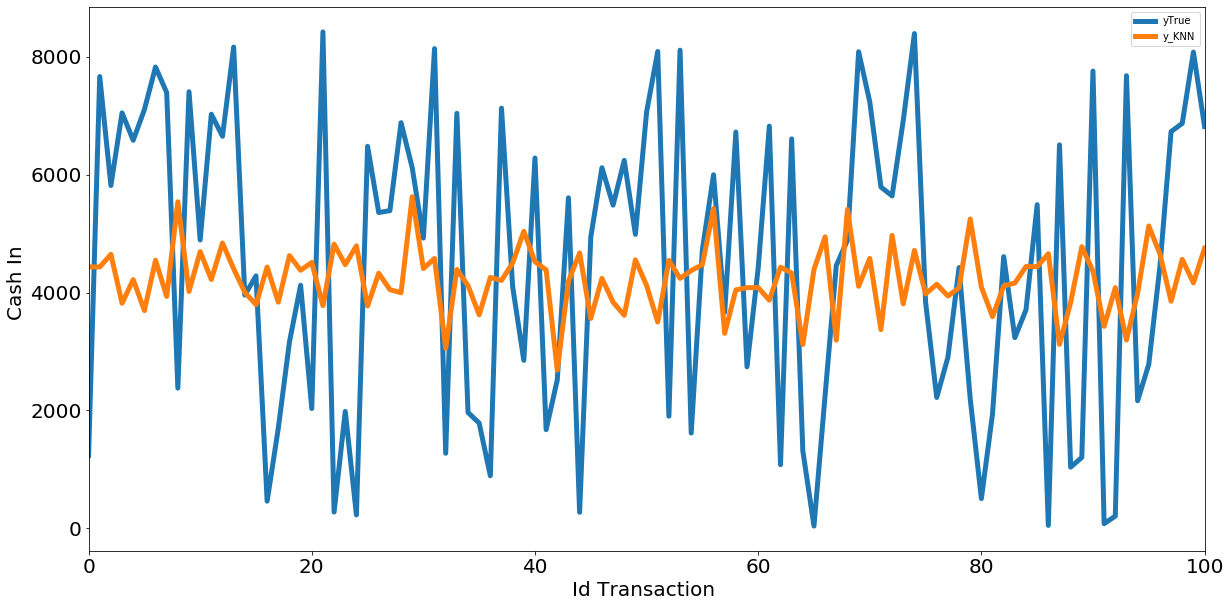

In [38]:
Df_regression.loc[:100,['yTrue','y_KNN']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Id Transaction ', fontsize=20)
plt.ylabel('Cash In ', fontsize=20)

## KNN

Text(0, 0.5, 'Cash In ')

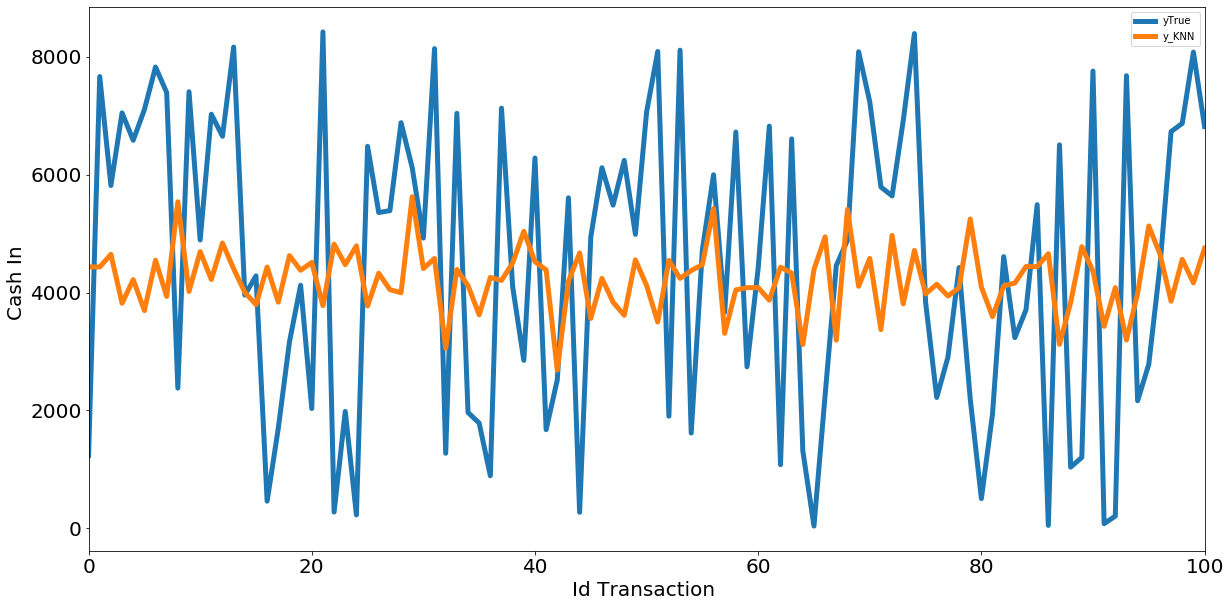

In [34]:
Df_regression.loc[:100,['yTrue','y_KNN']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Id Transaction ', fontsize=20)
plt.ylabel('Cash In ', fontsize=20)

# === Regression avec GBoost donne très bon résultat ===============

## Ensemble Learning 
La moyenne des modèles 

In [39]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

# Ensemble Learning :

### Score moyen des modèles :
Nous avons simplement en moyenne quatre modèles ici ENet, GBoost, KRR et Logistic Regression. Bien sûr, nous pourrions facilement ajouter plus de modèles dans le mélange.

In [45]:
averaged_models = AveragingModels(models = ( GBoost,KRR))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 2693.4224 (145.1356)



In [46]:
averaged_models.fit(X_train,y_train)
yEnsembleLearing = averaged_models.predict(X_test)

In [47]:
Df_regression['Ensemble Learning']=yEnsembleLearing
Df_regression

,yTrue,y_lasso,y_model_lgb,y_KNN,y_GBoost,y_ENet,y_KRR,Ensemble Learning
index,,,,,,,,
0,1237,4361.230478,4871.672061,4437.166667,5936.526495,4360.802471,5247.7500,5592.138247
1,7666,4260.023693,3874.847983,4434.944444,4251.237775,4259.611709,-909.1250,1671.056387
2,5817,4106.416503,4205.310088,4649.611111,4021.289441,4106.610854,3345.5000,3683.394721
3,7050,4528.926806,4216.188272,3819.333333,3861.517888,4527.953632,226.7500,2044.133944
4,6585,4439.231243,4331.020609,4220.555556,5322.312977,4439.433937,3754.5000,4538.406488
...,...,...,...,...,...,...,...,...
1195,493,4026.377124,3534.641447,3390.333333,3747.688435,4026.435625,4061.5000,3904.594218
1196,2245,3983.611064,2766.614896,4218.055556,848.419546,3983.354085,4403.5000,2625.959773
1197,5013,4043.302673,2661.850867,5110.388889,-83.335394,4043.296896,5818.0000,2867.332303


# Visualisation des pridection avec Ensemble Learning :

Text(0, 0.5, 'Cash In ')

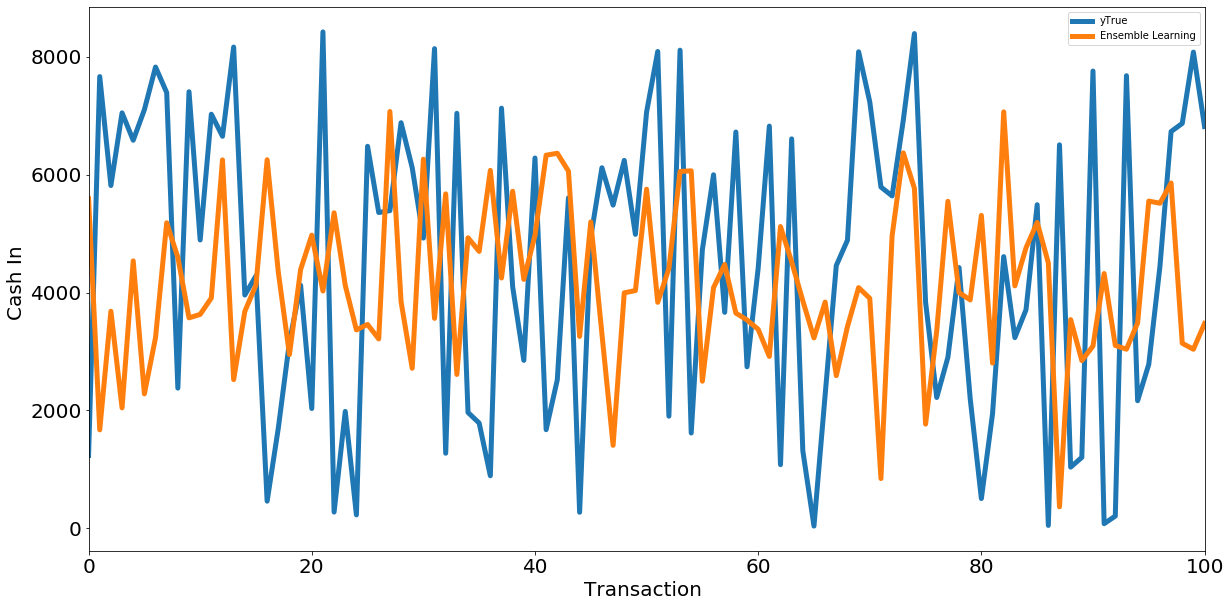

In [48]:
Df_regression.loc[:100,['yTrue','Ensemble Learning']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Transaction ', fontsize=20)
plt.ylabel('Cash In ', fontsize=20)

# Deep Learning 

In [49]:
#Gab_final
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

Gab_final_std = scaler.fit_transform(Gab_final.iloc[:,:27])
Gab_final_std

array([[0.        , 0.36363636, 0.        , ..., 0.92      , 0.66666667,
        0.64118206],
       [0.        , 0.36363636, 0.        , ..., 0.92      , 0.66666667,
        0.73643682],
       [0.        , 0.36363636, 0.        , ..., 0.92      , 0.66666667,
        0.74323716],
       ...,
       [0.        , 0.18181818, 1.        , ..., 0.76      , 0.11111111,
        0.55127756],
       [0.        , 0.18181818, 1.        , ..., 0.76      , 0.11111111,
        0.36541827],
       [0.        , 0.18181818, 1.        , ..., 0.76      , 0.11111111,
        0.98434922]])

## Feature Extraction using Principal Component Analysis (PCA) :

PCA est une réduction de dimensionnalité qui identifie les relations importantes dans nos données, transforme les données existantes en fonction de ces relations

In [50]:
from sklearn import decomposition

# Create a pca object with the 2 components as a parameter
pca = decomposition.PCA(n_components=20)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(Gab_final)
Dt=pd.DataFrame(X_std_pca)
Dt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2811.155073,-2547.041612,1343.094413,-669.876062,-35.264738,-42.549514,-55.289397,-47.439594,-2.337372,2.174876,-6.865167,-15.015406,-1.583080,3.917638,13.340207,-1.575780,4.153081,1.972338,-0.012664,2.221775
1,-4717.315820,893.322284,3121.264444,-915.770610,-54.305995,-43.306612,-48.260150,-47.741844,-24.390379,2.040226,-6.957082,-14.970438,2.350116,-1.166172,13.284847,-1.646967,4.046504,1.896502,-0.046822,2.225485
2,-4849.552486,-2389.712015,-3968.155737,-1227.650671,-44.392437,-43.222453,-44.412326,-47.872044,-49.347346,2.063690,-6.473452,-15.040720,-4.365069,7.555629,13.278591,-1.496920,4.166278,-0.047178,-0.032920,2.249253
3,-1807.465408,926.605090,3419.699549,-885.834494,-52.069728,-43.220580,-39.965249,-47.808404,-41.380977,2.283126,-6.889565,-15.028659,-1.334594,3.588696,13.309189,-1.563485,4.174776,-1.064529,-0.062943,2.222971
4,-4311.062002,-2611.604858,1192.217073,-969.720063,-50.967842,-44.109320,-37.437450,-48.013803,25.664185,2.934520,-5.788499,-15.100269,-1.743269,3.096268,12.984379,-2.090662,7.050735,0.931128,0.306702,1.978045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865771,-538.057679,-4199.139342,1530.682787,-1548.526237,-31.628371,-2.901975,10.716609,-30.391320,21.668397,0.652569,15.702404,14.094995,0.200586,11.418155,-10.521923,-2.248721,-1.237102,1.414506,0.445973,-2.845731
865772,-3504.829264,361.664758,3516.478495,6774.640614,-2.478437,27.832117,64.002044,-38.986634,-1.469735,15.286252,16.713179,12.972322,3.606926,-1.071132,-10.024156,-3.401858,-3.005908,1.567532,0.270748,-4.064726
865773,-1014.219962,-4746.039874,3927.835545,-667.924490,-16.850219,-1.789123,-39.502419,-29.671328,-28.335160,0.223795,15.275254,14.181773,11.179362,-2.756262,-10.296893,-2.410394,-1.318335,0.371746,0.347298,-2.929651
865774,2705.809597,-2816.304316,-2635.229577,-667.328731,-47.105629,-1.909499,-7.923964,-29.548370,-20.370492,0.697406,14.949518,14.187331,11.518656,-3.300512,-10.423237,-2.469636,-1.318028,1.312182,0.368522,-2.923886


# Verfier la corrélation entre les colonnes :
Elle va retourner un DataFrame dans lequel toutes les colonnes sont comparées. Seules les données numériques sont sélectionnées pour le calcul des corrélations.

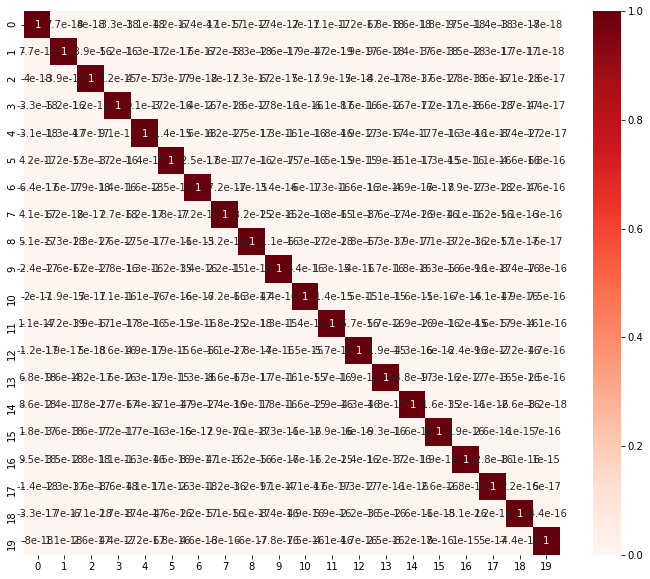

In [51]:
Gab_final
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = Dt.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Dt.iloc[:1000,:],Gab_final.iloc[:1000,27], test_size = 0.3, random_state = 101)




In [53]:
y_train=[i for i in y_train]
y_test=[i for i in y_test]
A=[]
B=[]
for i in y_train :
    A.append([i])
for i in y_test :
    B.append([i])



In [54]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

y_train = scaler.fit_transform(A)
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_test=scaler.fit_transform(B)

# Artificial neural network (ANN ) :

In [296]:
#Importing the Keras libraries and packages
import keras
from keras.models import Sequential
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers


# Initializing the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 25, init = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
# Adding the 2 hidden layer
classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu',kernel_regularizer=regularizers.l2(0.0001)))
# Adding the 3 hidden layer
classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu',kernel_regularizer=regularizers.l2(0.0001)))
# Adding the 4 hidden layer
classifier.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu',kernel_regularizer=regularizers.l2(0.0001)))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mse')
# Fitting the ANN to the Training set
his1=classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100 ,validation_data=(X_test, y_test))
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results
y_predANN = classifier.predict(X_test)
y_predANN = scaler.inverse_transform(y_predANN)
y_predANN=[i[0] for i in y_predANN]




Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 606us/step - loss: 0.2969 - val_loss: 0.2302
Epoch 2/100
700/700 [==============================] - 0s 314us/step - loss: 0.1284 - val_loss: 0.0713
Epoch 3/100
700/700 [==============================] - 0s 280us/step - loss: 0.0744 - val_loss: 0.0661
Epoch 4/100
700/700 [==============================] - 0s 303us/step - loss: 0.0669 - val_loss: 0.0579
Epoch 5/100
700/700 [==============================] - 0s 263us/step - loss: 0.0530 - val_loss: 0.0397
Epoch 6/100
700/700 [==============================] - 0s 263us/step - loss: 0.0257 - val_loss: 0.0074
Epoch 7/100
700/700 [==============================] - 0s 286us/step - loss: 0.0036 - val_loss: 0.0020
Epoch 8/100
700/700 [==============================] - 0s 280us/step - loss: 0.0019 - val_loss: 0.0016
Epoch 9/100
700/700 [==============================] - 0s 286us/step - loss: 0.0017 - val_loss: 0.0015
Epoch 10/100
700/700 [=====

# Visualiser le modèle

In [245]:
classifier.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_44 (Dense)             (None, 20)                520       
_________________________________________________________________
dense_45 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 9         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 2         
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
____________________________________________________

In [55]:
# Get training and test loss histories
training_loss = his1.history['loss']
test_loss = his1.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize=(20,10))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

NameError: name 'his1' is not defined

In [56]:
Df_regression['ANN']=y_predANN[:195]
rmsle(Df_regression['yTrue'], Df_regression['ANN'])


NameError: name 'y_predANN' is not defined

In [301]:
Df_regression[['yTrue','ANN']]

,yTrue,ANN
index,,
0,2968,2966.860352
1,6665,6672.623535
2,5296,5300.149414
3,3714,3712.232422
4,2048,2052.428467
...,...,...
190,2409,2414.701416
191,4417,4419.260254
192,6553,6556.843262


Text(0.5, 0, 'Year')

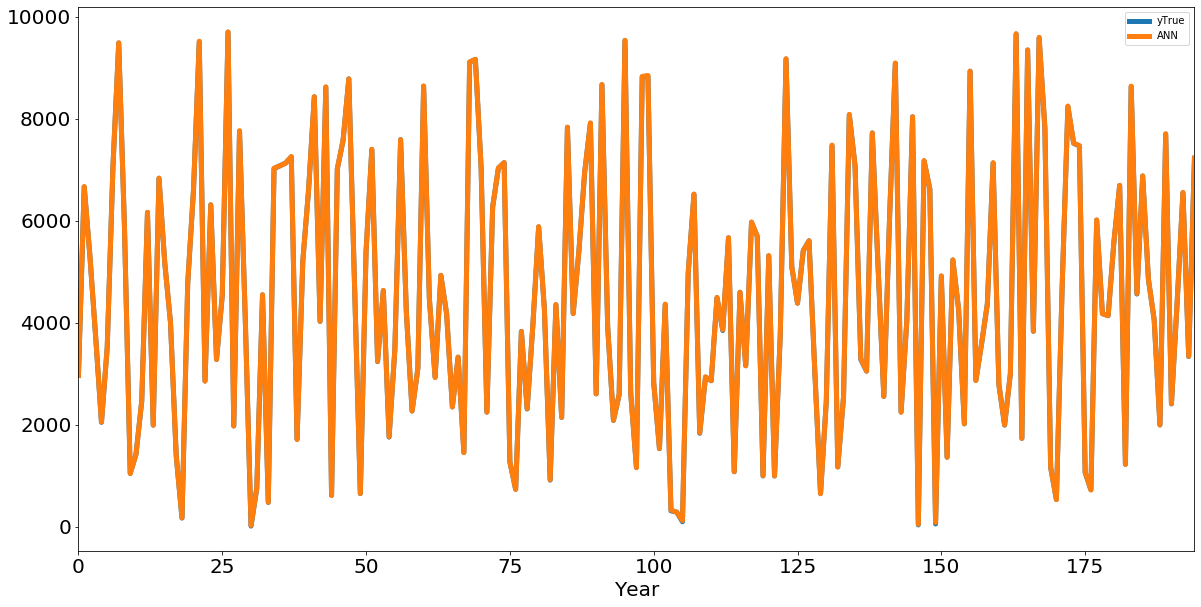

In [303]:

Df_regression.loc[:,['yTrue','ANN']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

## RNN avec LSTM

In [57]:
#Gab_final
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

Gab_final_std = scaler.fit_transform(Gab_final.iloc[:,:27])
Gab_final_std

from sklearn import decomposition

# Create a pca object with the 2 components as a parameter
pca = decomposition.PCA(n_components=20)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(Gab_final)
Dt=pd.DataFrame(X_std_pca)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Dt.iloc[:1000,:],Gab_final.iloc[:1000,27], test_size = 0.3, random_state = 101)




y_train=[i for i in y_train]
y_test=[i for i in y_test]
A=[]
B=[]
for i in y_train :
    A.append([i])
for i in y_test :
    B.append([i])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

y_train = scaler.fit_transform(A)
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_test=scaler.fit_transform(B)

In [58]:
X_test

array([[0.7826611 , 0.30522857, 0.75916449, ..., 0.13101436, 0.65232482,
        0.07118383],
       [0.08153331, 0.68693864, 0.16965359, ..., 0.6045154 , 0.85965563,
        0.1187005 ],
       [0.95616927, 0.5454272 , 0.62873964, ..., 0.32453754, 0.42756897,
        0.66883151],
       ...,
       [0.39950001, 0.74838094, 0.50750917, ..., 0.30778498, 0.58855943,
        0.31441999],
       [0.57440421, 0.6737375 , 0.47178242, ..., 0.42456196, 0.84539941,
        0.12612002],
       [0.48422658, 0.31130069, 0.26472751, ..., 0.41482366, 0.76112927,
        0.28600414]])

In [59]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
testX = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [60]:
trainX.shape

(700, 20, 1)

In [61]:
import numpy as np # linear algebra
from numpy import newaxis
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from keras.regularizers import L1L2

print ('import completed')

import completed


In [77]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1],1)))
regressor.add(Dropout(0.4))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))
# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['accuracy'] )
#regressor.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )
# Fitting to the training set
history=regressor.fit(trainX,y_train,epochs=500,batch_size=32 ,validation_data=(testX, y_test))

trainPredict = regressor.predict(trainX, batch_size=1)
regressor.reset_states()
testPredict = regressor.predict(testX, batch_size=1)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler1.inverse_transform([ytrain])
testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])


trainY1=[i for i in y_train]
testY1=[j for j in y_test]


Epoch 1/500
22/22 [==============================] - 4s 178ms/step - loss: 0.1072 - accuracy: 0.0157 - val_loss: 0.1073 - val_accuracy: 0.0300
Epoch 2/500
22/22 [==============================] - 2s 83ms/step - loss: 0.0838 - accuracy: 0.0214 - val_loss: 0.0890 - val_accuracy: 0.0100
Epoch 3/500
22/22 [==============================] - 2s 69ms/step - loss: 0.0847 - accuracy: 0.0214 - val_loss: 0.1143 - val_accuracy: 0.0300
Epoch 4/500
22/22 [==============================] - 1s 64ms/step - loss: 0.0835 - accuracy: 0.0171 - val_loss: 0.0852 - val_accuracy: 0.0300
Epoch 5/500
22/22 [==============================] - 1s 60ms/step - loss: 0.0855 - accuracy: 0.0200 - val_loss: 0.0851 - val_accuracy: 0.0300
Epoch 6/500
22/22 [==============================] - 1s 59ms/step - loss: 0.0811 - accuracy: 0.0200 - val_loss: 0.0773 - val_accuracy: 0.0333
Epoch 7/500
22/22 [==============================] - 1s 60ms/step - loss: 0.0792 - accuracy: 0.0200 - val_loss: 0.0786 - val_accuracy: 0.0133
Epoch

22/22 [==============================] - 2s 69ms/step - loss: 0.0268 - accuracy: 0.0300 - val_loss: 0.0169 - val_accuracy: 0.0400
Epoch 116/500
22/22 [==============================] - 1s 64ms/step - loss: 0.0213 - accuracy: 0.0300 - val_loss: 0.0176 - val_accuracy: 0.0400
Epoch 117/500
22/22 [==============================] - 2s 77ms/step - loss: 0.0241 - accuracy: 0.0286 - val_loss: 0.0333 - val_accuracy: 0.0400
Epoch 118/500
22/22 [==============================] - 1s 62ms/step - loss: 0.0241 - accuracy: 0.0300 - val_loss: 0.0191 - val_accuracy: 0.0333
Epoch 119/500
22/22 [==============================] - 1s 60ms/step - loss: 0.0193 - accuracy: 0.0300 - val_loss: 0.0191 - val_accuracy: 0.0400
Epoch 120/500
22/22 [==============================] - 1s 66ms/step - loss: 0.0213 - accuracy: 0.0300 - val_loss: 0.0208 - val_accuracy: 0.0400
Epoch 121/500
22/22 [==============================] - 1s 62ms/step - loss: 0.0192 - accuracy: 0.0286 - val_loss: 0.0243 - val_accuracy: 0.0400
Epoch 

Epoch 172/500
22/22 [==============================] - 1s 55ms/step - loss: 0.0065 - accuracy: 0.0300 - val_loss: 0.0011 - val_accuracy: 0.0400
Epoch 173/500
22/22 [==============================] - 1s 61ms/step - loss: 0.0066 - accuracy: 0.0300 - val_loss: 0.0048 - val_accuracy: 0.0400
Epoch 174/500
22/22 [==============================] - 1s 64ms/step - loss: 0.0049 - accuracy: 0.0300 - val_loss: 0.0014 - val_accuracy: 0.0400
Epoch 175/500
22/22 [==============================] - 1s 60ms/step - loss: 0.0061 - accuracy: 0.0300 - val_loss: 0.0078 - val_accuracy: 0.0400
Epoch 176/500
22/22 [==============================] - 2s 75ms/step - loss: 0.0052 - accuracy: 0.0300 - val_loss: 0.0023 - val_accuracy: 0.0400
Epoch 177/500
22/22 [==============================] - 2s 77ms/step - loss: 0.0063 - accuracy: 0.0300 - val_loss: 0.0055 - val_accuracy: 0.0400
Epoch 178/500
22/22 [==============================] - 2s 74ms/step - loss: 0.0050 - accuracy: 0.0300 - val_loss: 0.0051 - val_accuracy:

22/22 [==============================] - 1s 64ms/step - loss: 0.0025 - accuracy: 0.0300 - val_loss: 3.9016e-04 - val_accuracy: 0.0400
Epoch 285/500
22/22 [==============================] - 2s 78ms/step - loss: 0.0024 - accuracy: 0.0300 - val_loss: 8.4487e-04 - val_accuracy: 0.0400
Epoch 286/500
22/22 [==============================] - 2s 72ms/step - loss: 0.0028 - accuracy: 0.0300 - val_loss: 5.6258e-04 - val_accuracy: 0.0400
Epoch 287/500
22/22 [==============================] - 1s 63ms/step - loss: 0.0026 - accuracy: 0.0300 - val_loss: 0.0015 - val_accuracy: 0.0400
Epoch 288/500
22/22 [==============================] - 2s 72ms/step - loss: 0.0023 - accuracy: 0.0300 - val_loss: 0.0011 - val_accuracy: 0.0400
Epoch 289/500
22/22 [==============================] - 2s 75ms/step - loss: 0.0024 - accuracy: 0.0300 - val_loss: 2.8397e-04 - val_accuracy: 0.0400
Epoch 290/500
22/22 [==============================] - 1s 68ms/step - loss: 0.0025 - accuracy: 0.0300 - val_loss: 5.6729e-04 - val_acc

22/22 [==============================] - 1s 50ms/step - loss: 0.0016 - accuracy: 0.0300 - val_loss: 4.3291e-04 - val_accuracy: 0.0400
Epoch 341/500
22/22 [==============================] - 1s 53ms/step - loss: 0.0018 - accuracy: 0.0300 - val_loss: 0.0018 - val_accuracy: 0.0400
Epoch 342/500
22/22 [==============================] - 1s 61ms/step - loss: 0.0019 - accuracy: 0.0300 - val_loss: 0.0035 - val_accuracy: 0.0400
Epoch 343/500
22/22 [==============================] - 1s 60ms/step - loss: 0.0019 - accuracy: 0.0300 - val_loss: 3.8835e-04 - val_accuracy: 0.0400
Epoch 344/500
22/22 [==============================] - 1s 60ms/step - loss: 0.0017 - accuracy: 0.0300 - val_loss: 4.1484e-04 - val_accuracy: 0.0400
Epoch 345/500
22/22 [==============================] - 1s 59ms/step - loss: 0.0019 - accuracy: 0.0300 - val_loss: 0.0022 - val_accuracy: 0.0400
Epoch 346/500
22/22 [==============================] - 1s 53ms/step - loss: 0.0019 - accuracy: 0.0300 - val_loss: 0.0011 - val_accuracy: 0

Epoch 396/500
22/22 [==============================] - 1s 49ms/step - loss: 0.0017 - accuracy: 0.0300 - val_loss: 3.7413e-04 - val_accuracy: 0.0400
Epoch 397/500
22/22 [==============================] - 1s 55ms/step - loss: 0.0016 - accuracy: 0.0300 - val_loss: 0.0012 - val_accuracy: 0.0400
Epoch 398/500
22/22 [==============================] - 1s 54ms/step - loss: 0.0015 - accuracy: 0.0300 - val_loss: 4.8460e-04 - val_accuracy: 0.0400
Epoch 399/500
22/22 [==============================] - 1s 57ms/step - loss: 0.0015 - accuracy: 0.0300 - val_loss: 2.7502e-04 - val_accuracy: 0.0400
Epoch 400/500
22/22 [==============================] - 1s 57ms/step - loss: 0.0016 - accuracy: 0.0300 - val_loss: 2.8741e-04 - val_accuracy: 0.0400
Epoch 401/500
22/22 [==============================] - 1s 56ms/step - loss: 0.0016 - accuracy: 0.0300 - val_loss: 0.0016 - val_accuracy: 0.0400
Epoch 402/500
22/22 [==============================] - 1s 55ms/step - loss: 0.0015 - accuracy: 0.0300 - val_loss: 0.0017

Epoch 452/500
22/22 [==============================] - 1s 49ms/step - loss: 0.0014 - accuracy: 0.0300 - val_loss: 2.4879e-04 - val_accuracy: 0.0400
Epoch 453/500
22/22 [==============================] - 1s 54ms/step - loss: 0.0013 - accuracy: 0.0300 - val_loss: 0.0020 - val_accuracy: 0.0400
Epoch 454/500
22/22 [==============================] - 1s 49ms/step - loss: 0.0013 - accuracy: 0.0300 - val_loss: 4.7177e-04 - val_accuracy: 0.0400
Epoch 455/500
22/22 [==============================] - 1s 49ms/step - loss: 0.0016 - accuracy: 0.0300 - val_loss: 5.7181e-04 - val_accuracy: 0.0400
Epoch 456/500
22/22 [==============================] - 1s 58ms/step - loss: 0.0012 - accuracy: 0.0300 - val_loss: 7.6366e-04 - val_accuracy: 0.0400
Epoch 457/500
22/22 [==============================] - 1s 51ms/step - loss: 0.0015 - accuracy: 0.0300 - val_loss: 2.6864e-04 - val_accuracy: 0.0400
Epoch 458/500
22/22 [==============================] - 1s 48ms/step - loss: 0.0012 - accuracy: 0.0300 - val_loss: 0.

In [468]:
regressor.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 10, 50)            10400     
_________________________________________________________________
dropout_42 (Dropout)         (None, 10, 50)            0         
_________________________________________________________________
lstm_45 (LSTM)               (None, 10, 50)            20200     
_________________________________________________________________
dropout_43 (Dropout)         (None, 10, 50)            0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 10, 50)            20200     
_________________________________________________________________
dropout_44 (Dropout)         (None, 10, 50)            0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 50)              

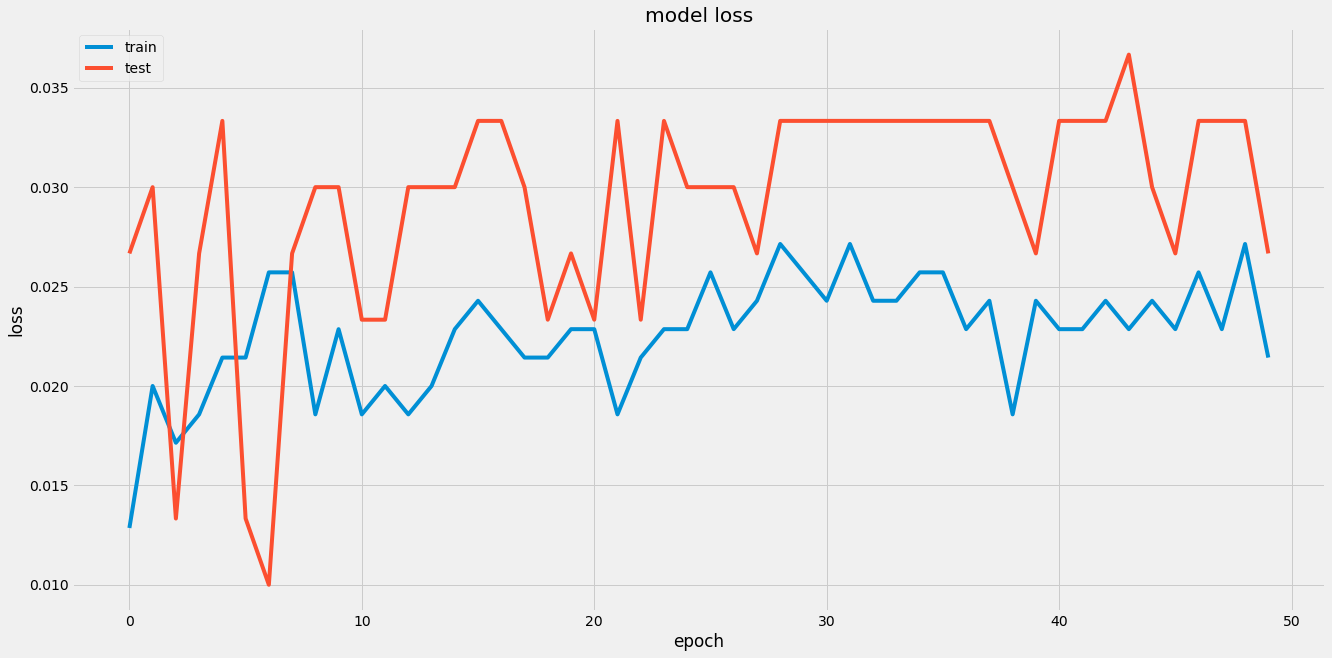

In [76]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

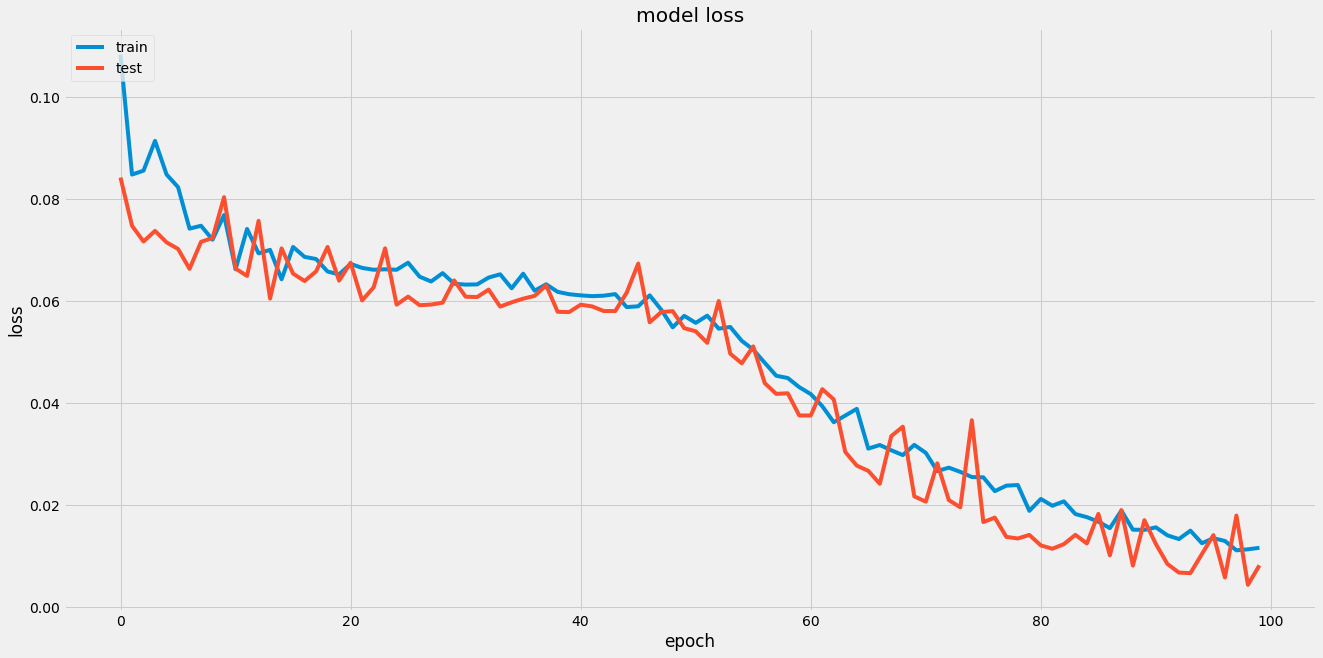

In [323]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Calcul root mean squared error

In [66]:
import math


trainScore = math.sqrt(mean_squared_error(trainY1, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY1, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
YLSTM=[i[0] for i in testPredict]


Train Score: 52.27 RMSE
Test Score: 52.85 RMSE


In [329]:
Df_regression

,yTrue,y_lasso,y_model_lgb,y_model_xgb,y_GBoost,y_ENet,y_KRR,Logistic Regression,Ensemble Learning,ANN,LSTM
index,,,,,,,,,,,
0,2968,4375.423022,3423.282505,3492.892822,2573.108755,4376.554345,4337.7500,5468,4188.853275,2966.860352,2888.848389
1,6665,4931.733266,3789.701684,2825.113525,733.083173,4929.454992,4956.0000,4320,3734.634541,6672.623535,6608.756836
2,5296,4836.371831,7241.263582,8390.350586,7343.814243,4835.106230,6233.3125,7130,6385.558243,5300.149414,6831.286133
3,3714,4621.895013,5833.783812,6571.661621,6941.152199,4621.367189,2648.5000,8720,5732.754847,3712.232422,4567.085938
4,2048,4412.850742,6231.903617,5743.519531,6878.284694,4412.435730,6189.2500,7192,6167.992606,2052.428467,2924.201660
...,...,...,...,...,...,...,...,...,...,...,...
190,2409,4319.605631,5461.792933,5888.652344,5726.627079,4318.586415,3098.0000,5478,4655.303373,2414.701416,1535.640137
191,4417,4991.762507,2342.174987,2875.806641,2711.225544,4983.505306,4640.1250,1965,3574.963963,4419.260254,6307.583008
192,6553,4975.698423,4680.920039,5017.580566,5476.240578,4974.718565,2715.0000,7857,5255.739786,6556.843262,6756.122559


Text(0, 0.5, 'Cash IN')

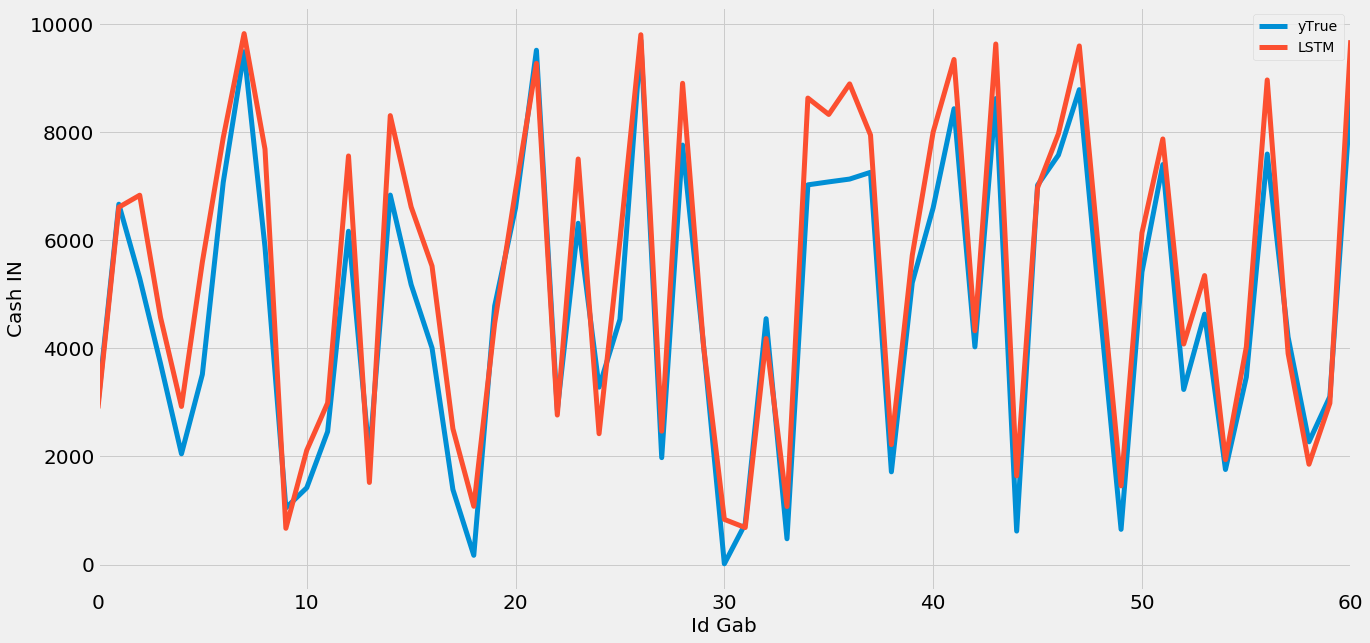

In [337]:
Df_regression['LSTM']=testPredict[:195]
rmsle(Df_regression['yTrue'], Df_regression['LSTM'])
Df_regression.loc[:60,['yTrue','LSTM']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Id Gab', fontsize=20)
plt.ylabel('Cash IN', fontsize=20)

## Conclusion :
    

In [335]:
Df_regression

,yTrue,y_lasso,y_model_lgb,y_model_xgb,y_GBoost,y_ENet,y_KRR,Logistic Regression,Ensemble Learning,ANN,LSTM
index,,,,,,,,,,,
0,2968,4375.423022,3423.282505,3492.892822,2573.108755,4376.554345,4337.7500,5468,4188.853275,2966.860352,2888.848389
1,6665,4931.733266,3789.701684,2825.113525,733.083173,4929.454992,4956.0000,4320,3734.634541,6672.623535,6608.756836
2,5296,4836.371831,7241.263582,8390.350586,7343.814243,4835.106230,6233.3125,7130,6385.558243,5300.149414,6831.286133
3,3714,4621.895013,5833.783812,6571.661621,6941.152199,4621.367189,2648.5000,8720,5732.754847,3712.232422,4567.085938
4,2048,4412.850742,6231.903617,5743.519531,6878.284694,4412.435730,6189.2500,7192,6167.992606,2052.428467,2924.201660
...,...,...,...,...,...,...,...,...,...,...,...
190,2409,4319.605631,5461.792933,5888.652344,5726.627079,4318.586415,3098.0000,5478,4655.303373,2414.701416,1535.640137
191,4417,4991.762507,2342.174987,2875.806641,2711.225544,4983.505306,4640.1250,1965,3574.963963,4419.260254,6307.583008
192,6553,4975.698423,4680.920039,5017.580566,5476.240578,4974.718565,2715.0000,7857,5255.739786,6556.843262,6756.122559
